In [1]:
import matplotlib.pyplot as plt
from math import sqrt
from time import sleep, time
from random import seed

from DE import DifferentialEvolution
from Packomania import Packomania
from utils import *

In [12]:
num_points = 7
bounds = [[0, 1] for i in range(num_points*2)]
popsize = 15*num_points*2
differential_weight = 0.3         
crossover_prob = 0.99              
max_generations = 2000   

In [3]:
pk = Packomania(num_points)
optimum = pk.distance
optimum_accuracy = 10**-3

In [13]:
# Standard DE
# set random seed
seed(42)
de = DifferentialEvolution(
    scattering_points, bounds, popsize, differential_weight, crossover_prob)
de.set_optimum(optimum, optimum_accuracy)
de.run(crossover='std', 
       save_pop_each_iter=True, 
       stop_on_no_improvements=False,
       max_generations=max_generations,
       verbose=True)

GENERATION: 1
	NUM POINTS    : 7
	EVALUATIONS   : 420
	AVG OBJ VAL   : 0.1352427315544656
	BEST OBJ VAL  : 0.31793697715327623
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.010s
	TOTAL TIME    : 0.010s
GENERATION: 2
	NUM POINTS    : 7
	EVALUATIONS   : 630
	AVG OBJ VAL   : 0.15547009909456333
	BEST OBJ VAL  : 0.31793697715327623
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.011s
	TOTAL TIME    : 0.021s
GENERATION: 3
	NUM POINTS    : 7
	EVALUATIONS   : 840
	AVG OBJ VAL   : 0.16670269762035575
	BEST OBJ VAL  : 0.31793697715327623
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.011s
	TOTAL TIME    : 0.032s
GENERATION: 4
	NUM POINTS    : 7
	EVALUATIONS   : 1050
	AVG OBJ VAL   : 0.18029019079585862
	BEST OBJ VAL  : 0.32654112207260744
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.012s
	TOTAL TIME    : 0.044s
GENERATION: 5
	NUM POINTS    : 7
	EVALUATIONS   : 1260
	AVG OBJ VAL   : 0.19244673889283337
	BEST OBJ VAL  : 0.34153205088105104
	OPTIMUM       : 0.5358

	NUM POINTS    : 7
	EVALUATIONS   : 9030
	AVG OBJ VAL   : 0.3021691242519414
	BEST OBJ VAL  : 0.4065123722249357
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.011s
	TOTAL TIME    : 0.451s
GENERATION: 43
	NUM POINTS    : 7
	EVALUATIONS   : 9240
	AVG OBJ VAL   : 0.30305335081615076
	BEST OBJ VAL  : 0.4065123722249357
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.011s
	TOTAL TIME    : 0.462s
GENERATION: 44
	NUM POINTS    : 7
	EVALUATIONS   : 9450
	AVG OBJ VAL   : 0.30361485602426247
	BEST OBJ VAL  : 0.4065123722249357
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.010s
	TOTAL TIME    : 0.472s
GENERATION: 45
	NUM POINTS    : 7
	EVALUATIONS   : 9660
	AVG OBJ VAL   : 0.30532983520816653
	BEST OBJ VAL  : 0.4065123722249357
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.011s
	TOTAL TIME    : 0.483s
GENERATION: 46
	NUM POINTS    : 7
	EVALUATIONS   : 9870
	AVG OBJ VAL   : 0.30675335286625083
	BEST OBJ VAL  : 0.4065123722249357
	OPTIMUM       : 0.5358983848622454

	NUM POINTS    : 7
	EVALUATIONS   : 19110
	AVG OBJ VAL   : 0.34317934261226923
	BEST OBJ VAL  : 0.44379635680217117
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.011s
	TOTAL TIME    : 0.971s
GENERATION: 91
	NUM POINTS    : 7
	EVALUATIONS   : 19320
	AVG OBJ VAL   : 0.3437831348808257
	BEST OBJ VAL  : 0.44379635680217117
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.011s
	TOTAL TIME    : 0.982s
GENERATION: 92
	NUM POINTS    : 7
	EVALUATIONS   : 19530
	AVG OBJ VAL   : 0.3438283870705327
	BEST OBJ VAL  : 0.44379635680217117
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.010s
	TOTAL TIME    : 0.992s
GENERATION: 93
	NUM POINTS    : 7
	EVALUATIONS   : 19740
	AVG OBJ VAL   : 0.3447951677785998
	BEST OBJ VAL  : 0.44379635680217117
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.010s
	TOTAL TIME    : 1.003s
GENERATION: 94
	NUM POINTS    : 7
	EVALUATIONS   : 19950
	AVG OBJ VAL   : 0.34504545831911215
	BEST OBJ VAL  : 0.44379635680217117
	OPTIMUM       : 0.53589838

GENERATION: 135
	NUM POINTS    : 7
	EVALUATIONS   : 28560
	AVG OBJ VAL   : 0.3634264826199198
	BEST OBJ VAL  : 0.4830779068958235
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.010s
	TOTAL TIME    : 1.512s
GENERATION: 136
	NUM POINTS    : 7
	EVALUATIONS   : 28770
	AVG OBJ VAL   : 0.3635876530814887
	BEST OBJ VAL  : 0.4830779068958235
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.010s
	TOTAL TIME    : 1.523s
GENERATION: 137
	NUM POINTS    : 7
	EVALUATIONS   : 28980
	AVG OBJ VAL   : 0.3637004032755075
	BEST OBJ VAL  : 0.4830779068958235
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.011s
	TOTAL TIME    : 1.534s
GENERATION: 138
	NUM POINTS    : 7
	EVALUATIONS   : 29190
	AVG OBJ VAL   : 0.3646023796732323
	BEST OBJ VAL  : 0.4830779068958235
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.010s
	TOTAL TIME    : 1.545s
GENERATION: 139
	NUM POINTS    : 7
	EVALUATIONS   : 29400
	AVG OBJ VAL   : 0.3650877251336997
	BEST OBJ VAL  : 0.4830779068958235
	OPTIMUM      

GENERATION: 187
	NUM POINTS    : 7
	EVALUATIONS   : 39480
	AVG OBJ VAL   : 0.3836421087931065
	BEST OBJ VAL  : 0.4830779068958235
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.011s
	TOTAL TIME    : 2.124s
GENERATION: 188
	NUM POINTS    : 7
	EVALUATIONS   : 39690
	AVG OBJ VAL   : 0.38391044521462026
	BEST OBJ VAL  : 0.4830779068958235
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.011s
	TOTAL TIME    : 2.135s
GENERATION: 189
	NUM POINTS    : 7
	EVALUATIONS   : 39900
	AVG OBJ VAL   : 0.3839964701532002
	BEST OBJ VAL  : 0.4830779068958235
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.012s
	TOTAL TIME    : 2.147s
GENERATION: 190
	NUM POINTS    : 7
	EVALUATIONS   : 40110
	AVG OBJ VAL   : 0.3843034142168873
	BEST OBJ VAL  : 0.4830779068958235
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.010s
	TOTAL TIME    : 2.157s
GENERATION: 191
	NUM POINTS    : 7
	EVALUATIONS   : 40320
	AVG OBJ VAL   : 0.3847167098099437
	BEST OBJ VAL  : 0.4830779068958235
	OPTIMUM     

	NUM POINTS    : 7
	EVALUATIONS   : 52290
	AVG OBJ VAL   : 0.4027126449869707
	BEST OBJ VAL  : 0.4830779068958235
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.011s
	TOTAL TIME    : 2.839s
GENERATION: 249
	NUM POINTS    : 7
	EVALUATIONS   : 52500
	AVG OBJ VAL   : 0.40278435842049554
	BEST OBJ VAL  : 0.4830779068958235
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.011s
	TOTAL TIME    : 2.850s
GENERATION: 250
	NUM POINTS    : 7
	EVALUATIONS   : 52710
	AVG OBJ VAL   : 0.403473582246684
	BEST OBJ VAL  : 0.4830779068958235
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.011s
	TOTAL TIME    : 2.862s
GENERATION: 251
	NUM POINTS    : 7
	EVALUATIONS   : 52920
	AVG OBJ VAL   : 0.4035282180229387
	BEST OBJ VAL  : 0.4830779068958235
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.011s
	TOTAL TIME    : 2.873s
GENERATION: 252
	NUM POINTS    : 7
	EVALUATIONS   : 53130
	AVG OBJ VAL   : 0.4042282789874425
	BEST OBJ VAL  : 0.4830779068958235
	OPTIMUM       : 0.53589838486

	NUM POINTS    : 7
	EVALUATIONS   : 63630
	AVG OBJ VAL   : 0.4181775252610372
	BEST OBJ VAL  : 0.4830779068958235
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.012s
	TOTAL TIME    : 3.480s
GENERATION: 303
	NUM POINTS    : 7
	EVALUATIONS   : 63840
	AVG OBJ VAL   : 0.4182588849402844
	BEST OBJ VAL  : 0.4830779068958235
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.011s
	TOTAL TIME    : 3.491s
GENERATION: 304
	NUM POINTS    : 7
	EVALUATIONS   : 64050
	AVG OBJ VAL   : 0.4182828285325517
	BEST OBJ VAL  : 0.4830779068958235
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.010s
	TOTAL TIME    : 3.501s
GENERATION: 305
	NUM POINTS    : 7
	EVALUATIONS   : 64260
	AVG OBJ VAL   : 0.4183344096209167
	BEST OBJ VAL  : 0.4830779068958235
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.011s
	TOTAL TIME    : 3.512s
GENERATION: 306
	NUM POINTS    : 7
	EVALUATIONS   : 64470
	AVG OBJ VAL   : 0.4184037121420642
	BEST OBJ VAL  : 0.4830779068958235
	OPTIMUM       : 0.53589838486

	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.011s
	TOTAL TIME    : 4.253s
GENERATION: 370
	NUM POINTS    : 7
	EVALUATIONS   : 77910
	AVG OBJ VAL   : 0.4298185836790839
	BEST OBJ VAL  : 0.49343630899377855
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.011s
	TOTAL TIME    : 4.264s
GENERATION: 371
	NUM POINTS    : 7
	EVALUATIONS   : 78120
	AVG OBJ VAL   : 0.43029411967344006
	BEST OBJ VAL  : 0.49343630899377855
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.011s
	TOTAL TIME    : 4.275s
GENERATION: 372
	NUM POINTS    : 7
	EVALUATIONS   : 78330
	AVG OBJ VAL   : 0.4303514641277167
	BEST OBJ VAL  : 0.49343630899377855
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.011s
	TOTAL TIME    : 4.286s
GENERATION: 373
	NUM POINTS    : 7
	EVALUATIONS   : 78540
	AVG OBJ VAL   : 0.43048180109630796
	BEST OBJ VAL  : 0.49343630899377855
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.010s
	TOTAL TIME    : 4.296s
GENERATION: 374
	NUM POINTS    : 7
	EVALUATIONS   : 78

	NUM POINTS    : 7
	EVALUATIONS   : 89880
	AVG OBJ VAL   : 0.44063474131777763
	BEST OBJ VAL  : 0.49796412849014265
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.010s
	TOTAL TIME    : 4.975s
GENERATION: 428
	NUM POINTS    : 7
	EVALUATIONS   : 90090
	AVG OBJ VAL   : 0.4406350194912249
	BEST OBJ VAL  : 0.49796412849014265
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.010s
	TOTAL TIME    : 4.986s
GENERATION: 429
	NUM POINTS    : 7
	EVALUATIONS   : 90300
	AVG OBJ VAL   : 0.4407386190635758
	BEST OBJ VAL  : 0.49796412849014265
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.011s
	TOTAL TIME    : 4.997s
GENERATION: 430
	NUM POINTS    : 7
	EVALUATIONS   : 90510
	AVG OBJ VAL   : 0.44088389894764746
	BEST OBJ VAL  : 0.49796412849014265
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.011s
	TOTAL TIME    : 5.008s
GENERATION: 431
	NUM POINTS    : 7
	EVALUATIONS   : 90720
	AVG OBJ VAL   : 0.44088389894764746
	BEST OBJ VAL  : 0.49796412849014265
	OPTIMUM       : 0.535

	NUM POINTS    : 7
	EVALUATIONS   : 102270
	AVG OBJ VAL   : 0.45174787175123543
	BEST OBJ VAL  : 0.49796412849014265
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.011s
	TOTAL TIME    : 5.660s
GENERATION: 487
	NUM POINTS    : 7
	EVALUATIONS   : 102480
	AVG OBJ VAL   : 0.45178542720683756
	BEST OBJ VAL  : 0.49796412849014265
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.011s
	TOTAL TIME    : 5.671s
GENERATION: 488
	NUM POINTS    : 7
	EVALUATIONS   : 102690
	AVG OBJ VAL   : 0.45178542720683756
	BEST OBJ VAL  : 0.49796412849014265
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.011s
	TOTAL TIME    : 5.682s
GENERATION: 489
	NUM POINTS    : 7
	EVALUATIONS   : 102900
	AVG OBJ VAL   : 0.4519603490592702
	BEST OBJ VAL  : 0.49796412849014265
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.011s
	TOTAL TIME    : 5.693s
GENERATION: 490
	NUM POINTS    : 7
	EVALUATIONS   : 103110
	AVG OBJ VAL   : 0.45210965440550016
	BEST OBJ VAL  : 0.49796412849014265
	OPTIMUM       :

	NUM POINTS    : 7
	EVALUATIONS   : 112350
	AVG OBJ VAL   : 0.45816398183048007
	BEST OBJ VAL  : 0.49859807972642295
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.010s
	TOTAL TIME    : 6.226s
GENERATION: 535
	NUM POINTS    : 7
	EVALUATIONS   : 112560
	AVG OBJ VAL   : 0.4586500317693756
	BEST OBJ VAL  : 0.49859807972642295
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.011s
	TOTAL TIME    : 6.237s
GENERATION: 536
	NUM POINTS    : 7
	EVALUATIONS   : 112770
	AVG OBJ VAL   : 0.4588853079018592
	BEST OBJ VAL  : 0.49859807972642295
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.011s
	TOTAL TIME    : 6.248s
GENERATION: 537
	NUM POINTS    : 7
	EVALUATIONS   : 112980
	AVG OBJ VAL   : 0.45915707422684704
	BEST OBJ VAL  : 0.49859807972642295
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.011s
	TOTAL TIME    : 6.259s
GENERATION: 538
	NUM POINTS    : 7
	EVALUATIONS   : 113190
	AVG OBJ VAL   : 0.4593428206664674
	BEST OBJ VAL  : 0.49859807972642295
	OPTIMUM       : 0

GENERATION: 604
	NUM POINTS    : 7
	EVALUATIONS   : 127050
	AVG OBJ VAL   : 0.46769130356915567
	BEST OBJ VAL  : 0.5045300986730615
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.011s
	TOTAL TIME    : 7.037s
GENERATION: 605
	NUM POINTS    : 7
	EVALUATIONS   : 127260
	AVG OBJ VAL   : 0.4680540205487634
	BEST OBJ VAL  : 0.5045300986730615
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.011s
	TOTAL TIME    : 7.048s
GENERATION: 606
	NUM POINTS    : 7
	EVALUATIONS   : 127470
	AVG OBJ VAL   : 0.46819016860821305
	BEST OBJ VAL  : 0.5045300986730615
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.010s
	TOTAL TIME    : 7.058s
GENERATION: 607
	NUM POINTS    : 7
	EVALUATIONS   : 127680
	AVG OBJ VAL   : 0.4685874880739878
	BEST OBJ VAL  : 0.5045300986730615
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.012s
	TOTAL TIME    : 7.070s
GENERATION: 608
	NUM POINTS    : 7
	EVALUATIONS   : 127890
	AVG OBJ VAL   : 0.4687014751581666
	BEST OBJ VAL  : 0.5045300986730615
	OPTIMU

	NUM POINTS    : 7
	EVALUATIONS   : 136710
	AVG OBJ VAL   : 0.4769629833101215
	BEST OBJ VAL  : 0.50889437119927
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.011s
	TOTAL TIME    : 7.581s
GENERATION: 651
	NUM POINTS    : 7
	EVALUATIONS   : 136920
	AVG OBJ VAL   : 0.47727531937679335
	BEST OBJ VAL  : 0.50889437119927
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.011s
	TOTAL TIME    : 7.592s
GENERATION: 652
	NUM POINTS    : 7
	EVALUATIONS   : 137130
	AVG OBJ VAL   : 0.47772395212286245
	BEST OBJ VAL  : 0.50889437119927
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.011s
	TOTAL TIME    : 7.603s
GENERATION: 653
	NUM POINTS    : 7
	EVALUATIONS   : 137340
	AVG OBJ VAL   : 0.477749483010123
	BEST OBJ VAL  : 0.50889437119927
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.011s
	TOTAL TIME    : 7.614s
GENERATION: 654
	NUM POINTS    : 7
	EVALUATIONS   : 137550
	AVG OBJ VAL   : 0.47806410716619113
	BEST OBJ VAL  : 0.50889437119927
	OPTIMUM       : 0.53589838486224

	NUM POINTS    : 7
	EVALUATIONS   : 149730
	AVG OBJ VAL   : 0.4871762869106875
	BEST OBJ VAL  : 0.5125855195359064
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.010s
	TOTAL TIME    : 8.298s
GENERATION: 713
	NUM POINTS    : 7
	EVALUATIONS   : 149940
	AVG OBJ VAL   : 0.4874132601733356
	BEST OBJ VAL  : 0.5125855195359064
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.011s
	TOTAL TIME    : 8.309s
GENERATION: 714
	NUM POINTS    : 7
	EVALUATIONS   : 150150
	AVG OBJ VAL   : 0.48747563450700304
	BEST OBJ VAL  : 0.5125855195359064
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.011s
	TOTAL TIME    : 8.321s
GENERATION: 715
	NUM POINTS    : 7
	EVALUATIONS   : 150360
	AVG OBJ VAL   : 0.48749916656142644
	BEST OBJ VAL  : 0.5125855195359064
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.010s
	TOTAL TIME    : 8.331s
GENERATION: 716
	NUM POINTS    : 7
	EVALUATIONS   : 150570
	AVG OBJ VAL   : 0.48760555561273305
	BEST OBJ VAL  : 0.5125855195359064
	OPTIMUM       : 0.535

	EVALUATIONS   : 164430
	AVG OBJ VAL   : 0.4940909143589781
	BEST OBJ VAL  : 0.5154665095778226
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.010s
	TOTAL TIME    : 9.102s
GENERATION: 783
	NUM POINTS    : 7
	EVALUATIONS   : 164640
	AVG OBJ VAL   : 0.4941815496898358
	BEST OBJ VAL  : 0.5154665095778226
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.011s
	TOTAL TIME    : 9.158s
GENERATION: 784
	NUM POINTS    : 7
	EVALUATIONS   : 164850
	AVG OBJ VAL   : 0.49423285404599315
	BEST OBJ VAL  : 0.5154665095778226
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.010s
	TOTAL TIME    : 9.167s
GENERATION: 785
	NUM POINTS    : 7
	EVALUATIONS   : 165060
	AVG OBJ VAL   : 0.4942369638762386
	BEST OBJ VAL  : 0.5154665095778226
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.011s
	TOTAL TIME    : 9.179s
GENERATION: 786
	NUM POINTS    : 7
	EVALUATIONS   : 165270
	AVG OBJ VAL   : 0.49428211909587694
	BEST OBJ VAL  : 0.5154665095778226
	OPTIMUM       : 0.5358983848622454
	GEN D

	NUM POINTS    : 7
	EVALUATIONS   : 173040
	AVG OBJ VAL   : 0.4970402570817486
	BEST OBJ VAL  : 0.5154665095778226
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.011s
	TOTAL TIME    : 9.592s
GENERATION: 824
	NUM POINTS    : 7
	EVALUATIONS   : 173250
	AVG OBJ VAL   : 0.49723270345359305
	BEST OBJ VAL  : 0.5154665095778226
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.011s
	TOTAL TIME    : 9.603s
GENERATION: 825
	NUM POINTS    : 7
	EVALUATIONS   : 173460
	AVG OBJ VAL   : 0.4972919147727299
	BEST OBJ VAL  : 0.5154665095778226
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.011s
	TOTAL TIME    : 9.614s
GENERATION: 826
	NUM POINTS    : 7
	EVALUATIONS   : 173670
	AVG OBJ VAL   : 0.49738543179037226
	BEST OBJ VAL  : 0.5154665095778226
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.010s
	TOTAL TIME    : 9.624s
GENERATION: 827
	NUM POINTS    : 7
	EVALUATIONS   : 173880
	AVG OBJ VAL   : 0.4973927082480874
	BEST OBJ VAL  : 0.5154665095778226
	OPTIMUM       : 0.5358

GENERATION: 891
	NUM POINTS    : 7
	EVALUATIONS   : 187320
	AVG OBJ VAL   : 0.5016889818429268
	BEST OBJ VAL  : 0.5226712629291058
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.011s
	TOTAL TIME    : 10.374s
GENERATION: 892
	NUM POINTS    : 7
	EVALUATIONS   : 187530
	AVG OBJ VAL   : 0.5016889818429268
	BEST OBJ VAL  : 0.5226712629291058
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.011s
	TOTAL TIME    : 10.385s
GENERATION: 893
	NUM POINTS    : 7
	EVALUATIONS   : 187740
	AVG OBJ VAL   : 0.5016889818429268
	BEST OBJ VAL  : 0.5226712629291058
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.054s
	TOTAL TIME    : 10.440s
GENERATION: 894
	NUM POINTS    : 7
	EVALUATIONS   : 187950
	AVG OBJ VAL   : 0.5017679606281198
	BEST OBJ VAL  : 0.5226712629291058
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.011s
	TOTAL TIME    : 10.451s
GENERATION: 895
	NUM POINTS    : 7
	EVALUATIONS   : 188160
	AVG OBJ VAL   : 0.5017855669871825
	BEST OBJ VAL  : 0.5226712629291058
	OPTI

	NUM POINTS    : 7
	EVALUATIONS   : 199290
	AVG OBJ VAL   : 0.505365786353189
	BEST OBJ VAL  : 0.526579970208114
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.010s
	TOTAL TIME    : 11.031s
GENERATION: 949
	NUM POINTS    : 7
	EVALUATIONS   : 199500
	AVG OBJ VAL   : 0.5055958820050952
	BEST OBJ VAL  : 0.526579970208114
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.011s
	TOTAL TIME    : 11.086s
GENERATION: 950
	NUM POINTS    : 7
	EVALUATIONS   : 199710
	AVG OBJ VAL   : 0.5056960816951797
	BEST OBJ VAL  : 0.526579970208114
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.011s
	TOTAL TIME    : 11.097s
GENERATION: 951
	NUM POINTS    : 7
	EVALUATIONS   : 199920
	AVG OBJ VAL   : 0.505760304053954
	BEST OBJ VAL  : 0.526579970208114
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.010s
	TOTAL TIME    : 11.107s
GENERATION: 952
	NUM POINTS    : 7
	EVALUATIONS   : 200130
	AVG OBJ VAL   : 0.5058939642192852
	BEST OBJ VAL  : 0.526579970208114
	OPTIMUM       : 0.535898384

	NUM POINTS    : 7
	EVALUATIONS   : 208530
	AVG OBJ VAL   : 0.50893635050759
	BEST OBJ VAL  : 0.526579970208114
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.011s
	TOTAL TIME    : 11.552s
GENERATION: 993
	NUM POINTS    : 7
	EVALUATIONS   : 208740
	AVG OBJ VAL   : 0.50900875395327
	BEST OBJ VAL  : 0.526579970208114
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.011s
	TOTAL TIME    : 11.563s
GENERATION: 994
	NUM POINTS    : 7
	EVALUATIONS   : 208950
	AVG OBJ VAL   : 0.5090196631200946
	BEST OBJ VAL  : 0.526579970208114
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.010s
	TOTAL TIME    : 11.573s
GENERATION: 995
	NUM POINTS    : 7
	EVALUATIONS   : 209160
	AVG OBJ VAL   : 0.509095939246484
	BEST OBJ VAL  : 0.526579970208114
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.010s
	TOTAL TIME    : 11.584s
GENERATION: 996
	NUM POINTS    : 7
	EVALUATIONS   : 209370
	AVG OBJ VAL   : 0.5091515782875018
	BEST OBJ VAL  : 0.526579970208114
	OPTIMUM       : 0.535898384862

	NUM POINTS    : 7
	EVALUATIONS   : 218400
	AVG OBJ VAL   : 0.512792155089927
	BEST OBJ VAL  : 0.5310453241432874
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.011s
	TOTAL TIME    : 12.098s
GENERATION: 1040
	NUM POINTS    : 7
	EVALUATIONS   : 218610
	AVG OBJ VAL   : 0.5129360799619872
	BEST OBJ VAL  : 0.5310453241432874
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.010s
	TOTAL TIME    : 12.108s
GENERATION: 1041
	NUM POINTS    : 7
	EVALUATIONS   : 218820
	AVG OBJ VAL   : 0.5130429213588074
	BEST OBJ VAL  : 0.5310453241432874
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.010s
	TOTAL TIME    : 12.119s
GENERATION: 1042
	NUM POINTS    : 7
	EVALUATIONS   : 219030
	AVG OBJ VAL   : 0.5132440760555264
	BEST OBJ VAL  : 0.5310453241432874
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.011s
	TOTAL TIME    : 12.130s
GENERATION: 1043
	NUM POINTS    : 7
	EVALUATIONS   : 219240
	AVG OBJ VAL   : 0.5132694741253382
	BEST OBJ VAL  : 0.5310453241432874
	OPTIMUM       : 0

	NUM POINTS    : 7
	EVALUATIONS   : 231210
	AVG OBJ VAL   : 0.5225048351193745
	BEST OBJ VAL  : 0.5329305534268608
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.010s
	TOTAL TIME    : 12.796s
GENERATION: 1101
	NUM POINTS    : 7
	EVALUATIONS   : 231420
	AVG OBJ VAL   : 0.5227139045081395
	BEST OBJ VAL  : 0.5329305534268608
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.011s
	TOTAL TIME    : 12.807s
GENERATION: 1102
	NUM POINTS    : 7
	EVALUATIONS   : 231630
	AVG OBJ VAL   : 0.5230313785774086
	BEST OBJ VAL  : 0.5329305534268608
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.011s
	TOTAL TIME    : 12.818s
GENERATION: 1103
	NUM POINTS    : 7
	EVALUATIONS   : 231840
	AVG OBJ VAL   : 0.5234511252534682
	BEST OBJ VAL  : 0.5329305534268608
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.011s
	TOTAL TIME    : 12.829s
GENERATION: 1104
	NUM POINTS    : 7
	EVALUATIONS   : 232050
	AVG OBJ VAL   : 0.5236304184089622
	BEST OBJ VAL  : 0.5329305534268608
	OPTIMUM       : 

	TOTAL TIME    : 13.483s
GENERATION: 1161
	NUM POINTS    : 7
	EVALUATIONS   : 244020
	AVG OBJ VAL   : 0.5308892518838978
	BEST OBJ VAL  : 0.533706109120674
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.010s
	TOTAL TIME    : 13.493s
GENERATION: 1162
	NUM POINTS    : 7
	EVALUATIONS   : 244230
	AVG OBJ VAL   : 0.530966170659427
	BEST OBJ VAL  : 0.5341586478472817
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.011s
	TOTAL TIME    : 13.504s
GENERATION: 1163
	NUM POINTS    : 7
	EVALUATIONS   : 244440
	AVG OBJ VAL   : 0.5310657596445877
	BEST OBJ VAL  : 0.5341586478472817
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.011s
	TOTAL TIME    : 13.515s
GENERATION: 1164
	NUM POINTS    : 7
	EVALUATIONS   : 244650
	AVG OBJ VAL   : 0.5311136977337377
	BEST OBJ VAL  : 0.5341586478472817
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.010s
	TOTAL TIME    : 13.525s
GENERATION: 1165
	NUM POINTS    : 7
	EVALUATIONS   : 244860
	AVG OBJ VAL   : 0.5311710947906368
	BEST OBJ VAL

	NUM POINTS    : 7
	EVALUATIONS   : 256200
	AVG OBJ VAL   : 0.5339263162206382
	BEST OBJ VAL  : 0.534968734259349
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.011s
	TOTAL TIME    : 14.149s
Optimum reached


In [14]:
popsize_bounds = 15*num_points*2
crossover_prob_bounds = 0.99
differential_weight_bounds = 0.3
de_bp = DifferentialEvolution(
    scattering_points, bounds, popsize_bounds, differential_weight_bounds, crossover_prob_bounds)
de_bp.set_optimum(optimum, optimum_accuracy)
de_bp.run(crossover='best_points3', 
       save_pop_each_iter=True, 
       stop_on_no_improvements=False,
       max_generations=max_generations,
       verbose=True)

GENERATION: 1
	NUM POINTS    : 7
	EVALUATIONS   : 420
	AVG OBJ VAL   : 0.1526504765853266
	BEST OBJ VAL  : 0.3112301047374487
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.010s
	TOTAL TIME    : 0.010s
GENERATION: 2
	NUM POINTS    : 7
	EVALUATIONS   : 630
	AVG OBJ VAL   : 0.17418934118432142
	BEST OBJ VAL  : 0.3112301047374487
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.010s
	TOTAL TIME    : 0.020s
GENERATION: 3
	NUM POINTS    : 7
	EVALUATIONS   : 840
	AVG OBJ VAL   : 0.19061945535308542
	BEST OBJ VAL  : 0.3334361427604852
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.010s
	TOTAL TIME    : 0.031s
GENERATION: 4
	NUM POINTS    : 7
	EVALUATIONS   : 1050
	AVG OBJ VAL   : 0.20376051378030788
	BEST OBJ VAL  : 0.3590475852609036
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.010s
	TOTAL TIME    : 0.042s
GENERATION: 5
	NUM POINTS    : 7
	EVALUATIONS   : 1260
	AVG OBJ VAL   : 0.21188523488723243
	BEST OBJ VAL  : 0.3590475852609036
	OPTIMUM       : 0.535898384

GENERATION: 62
	NUM POINTS    : 7
	EVALUATIONS   : 13230
	AVG OBJ VAL   : 0.34572747563046163
	BEST OBJ VAL  : 0.4632414780601837
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.011s
	TOTAL TIME    : 0.801s
GENERATION: 63
	NUM POINTS    : 7
	EVALUATIONS   : 13440
	AVG OBJ VAL   : 0.3462043566787175
	BEST OBJ VAL  : 0.4632414780601837
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.011s
	TOTAL TIME    : 0.812s
GENERATION: 64
	NUM POINTS    : 7
	EVALUATIONS   : 13650
	AVG OBJ VAL   : 0.34704743541822664
	BEST OBJ VAL  : 0.4632414780601837
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.012s
	TOTAL TIME    : 0.824s
GENERATION: 65
	NUM POINTS    : 7
	EVALUATIONS   : 13860
	AVG OBJ VAL   : 0.3475381453277026
	BEST OBJ VAL  : 0.4632414780601837
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.011s
	TOTAL TIME    : 0.835s
GENERATION: 66
	NUM POINTS    : 7
	EVALUATIONS   : 14070
	AVG OBJ VAL   : 0.34775917689373104
	BEST OBJ VAL  : 0.4632414780601837
	OPTIMUM       :

	NUM POINTS    : 7
	EVALUATIONS   : 22680
	AVG OBJ VAL   : 0.369102822763859
	BEST OBJ VAL  : 0.47074887261787285
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.011s
	TOTAL TIME    : 1.299s
GENERATION: 108
	NUM POINTS    : 7
	EVALUATIONS   : 22890
	AVG OBJ VAL   : 0.3696828807812224
	BEST OBJ VAL  : 0.47074887261787285
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.011s
	TOTAL TIME    : 1.309s
GENERATION: 109
	NUM POINTS    : 7
	EVALUATIONS   : 23100
	AVG OBJ VAL   : 0.36988035037008843
	BEST OBJ VAL  : 0.47074887261787285
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.011s
	TOTAL TIME    : 1.320s
GENERATION: 110
	NUM POINTS    : 7
	EVALUATIONS   : 23310
	AVG OBJ VAL   : 0.37011428646726874
	BEST OBJ VAL  : 0.47074887261787285
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.011s
	TOTAL TIME    : 1.331s
GENERATION: 111
	NUM POINTS    : 7
	EVALUATIONS   : 23520
	AVG OBJ VAL   : 0.3702537047323684
	BEST OBJ VAL  : 0.47074887261787285
	OPTIMUM       : 0.53589

	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.011s
	TOTAL TIME    : 1.933s
GENERATION: 161
	NUM POINTS    : 7
	EVALUATIONS   : 34020
	AVG OBJ VAL   : 0.3856338286300044
	BEST OBJ VAL  : 0.47074887261787285
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.011s
	TOTAL TIME    : 1.944s
GENERATION: 162
	NUM POINTS    : 7
	EVALUATIONS   : 34230
	AVG OBJ VAL   : 0.38612846045134586
	BEST OBJ VAL  : 0.47074887261787285
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.011s
	TOTAL TIME    : 1.955s
GENERATION: 163
	NUM POINTS    : 7
	EVALUATIONS   : 34440
	AVG OBJ VAL   : 0.38631211570225615
	BEST OBJ VAL  : 0.47074887261787285
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.011s
	TOTAL TIME    : 1.966s
GENERATION: 164
	NUM POINTS    : 7
	EVALUATIONS   : 34650
	AVG OBJ VAL   : 0.38631211570225615
	BEST OBJ VAL  : 0.47074887261787285
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.011s
	TOTAL TIME    : 1.977s
GENERATION: 165
	NUM POINTS    : 7
	EVALUATIONS   : 3

	AVG OBJ VAL   : 0.40523154120342036
	BEST OBJ VAL  : 0.47824861909759186
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.011s
	TOTAL TIME    : 2.735s
GENERATION: 229
	NUM POINTS    : 7
	EVALUATIONS   : 48300
	AVG OBJ VAL   : 0.40535939196445264
	BEST OBJ VAL  : 0.47824861909759186
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.011s
	TOTAL TIME    : 2.791s
GENERATION: 230
	NUM POINTS    : 7
	EVALUATIONS   : 48510
	AVG OBJ VAL   : 0.4054552717604872
	BEST OBJ VAL  : 0.47824861909759186
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.011s
	TOTAL TIME    : 2.802s
GENERATION: 231
	NUM POINTS    : 7
	EVALUATIONS   : 48720
	AVG OBJ VAL   : 0.4055248980417307
	BEST OBJ VAL  : 0.47824861909759186
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.011s
	TOTAL TIME    : 2.812s
GENERATION: 232
	NUM POINTS    : 7
	EVALUATIONS   : 48930
	AVG OBJ VAL   : 0.40587580240936433
	BEST OBJ VAL  : 0.47824861909759186
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.011s
	TOT

GENERATION: 284
	NUM POINTS    : 7
	EVALUATIONS   : 59850
	AVG OBJ VAL   : 0.4179539445625812
	BEST OBJ VAL  : 0.48875278550583917
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.011s
	TOTAL TIME    : 3.452s
GENERATION: 285
	NUM POINTS    : 7
	EVALUATIONS   : 60060
	AVG OBJ VAL   : 0.41814842242892497
	BEST OBJ VAL  : 0.48875278550583917
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.010s
	TOTAL TIME    : 3.463s
GENERATION: 286
	NUM POINTS    : 7
	EVALUATIONS   : 60270
	AVG OBJ VAL   : 0.41822651766009644
	BEST OBJ VAL  : 0.48875278550583917
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.011s
	TOTAL TIME    : 3.474s
GENERATION: 287
	NUM POINTS    : 7
	EVALUATIONS   : 60480
	AVG OBJ VAL   : 0.4186532052597403
	BEST OBJ VAL  : 0.48875278550583917
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.011s
	TOTAL TIME    : 3.485s
GENERATION: 288
	NUM POINTS    : 7
	EVALUATIONS   : 60690
	AVG OBJ VAL   : 0.4188449360380779
	BEST OBJ VAL  : 0.48875278550583917
	OPTIMU

	BEST OBJ VAL  : 0.4908430667923407
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.012s
	TOTAL TIME    : 4.012s
GENERATION: 335
	NUM POINTS    : 7
	EVALUATIONS   : 70560
	AVG OBJ VAL   : 0.4267089777038551
	BEST OBJ VAL  : 0.4908430667923407
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.011s
	TOTAL TIME    : 4.023s
GENERATION: 336
	NUM POINTS    : 7
	EVALUATIONS   : 70770
	AVG OBJ VAL   : 0.42672719311245727
	BEST OBJ VAL  : 0.4908430667923407
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.011s
	TOTAL TIME    : 4.034s
GENERATION: 337
	NUM POINTS    : 7
	EVALUATIONS   : 70980
	AVG OBJ VAL   : 0.42676276303098887
	BEST OBJ VAL  : 0.4908430667923407
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.011s
	TOTAL TIME    : 4.045s
GENERATION: 338
	NUM POINTS    : 7
	EVALUATIONS   : 71190
	AVG OBJ VAL   : 0.42700165930699885
	BEST OBJ VAL  : 0.4908430667923407
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.010s
	TOTAL TIME    : 4.056s
GENERATION: 339
	NUM 

GENERATION: 395
	NUM POINTS    : 7
	EVALUATIONS   : 83160
	AVG OBJ VAL   : 0.4334527254133839
	BEST OBJ VAL  : 0.4936164891601976
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.011s
	TOTAL TIME    : 4.790s
GENERATION: 396
	NUM POINTS    : 7
	EVALUATIONS   : 83370
	AVG OBJ VAL   : 0.4339265042103187
	BEST OBJ VAL  : 0.4936164891601976
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.011s
	TOTAL TIME    : 4.801s
GENERATION: 397
	NUM POINTS    : 7
	EVALUATIONS   : 83580
	AVG OBJ VAL   : 0.4341611704518854
	BEST OBJ VAL  : 0.4936164891601976
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.011s
	TOTAL TIME    : 4.812s
GENERATION: 398
	NUM POINTS    : 7
	EVALUATIONS   : 83790
	AVG OBJ VAL   : 0.4342757199992013
	BEST OBJ VAL  : 0.4936164891601976
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.011s
	TOTAL TIME    : 4.824s
GENERATION: 399
	NUM POINTS    : 7
	EVALUATIONS   : 84000
	AVG OBJ VAL   : 0.43451349503918707
	BEST OBJ VAL  : 0.4936164891601976
	OPTIMUM     

	NUM POINTS    : 7
	EVALUATIONS   : 93450
	AVG OBJ VAL   : 0.4428262528983871
	BEST OBJ VAL  : 0.4936164891601976
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.011s
	TOTAL TIME    : 5.343s
GENERATION: 445
	NUM POINTS    : 7
	EVALUATIONS   : 93660
	AVG OBJ VAL   : 0.44284706554851166
	BEST OBJ VAL  : 0.497872655783192
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.011s
	TOTAL TIME    : 5.354s
GENERATION: 446
	NUM POINTS    : 7
	EVALUATIONS   : 93870
	AVG OBJ VAL   : 0.4428472855409272
	BEST OBJ VAL  : 0.497872655783192
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.012s
	TOTAL TIME    : 5.366s
GENERATION: 447
	NUM POINTS    : 7
	EVALUATIONS   : 94080
	AVG OBJ VAL   : 0.4429046307293512
	BEST OBJ VAL  : 0.497872655783192
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.011s
	TOTAL TIME    : 5.377s
GENERATION: 448
	NUM POINTS    : 7
	EVALUATIONS   : 94290
	AVG OBJ VAL   : 0.4430006934212451
	BEST OBJ VAL  : 0.497872655783192
	OPTIMUM       : 0.53589838486224

GENERATION: 506
	NUM POINTS    : 7
	EVALUATIONS   : 106470
	AVG OBJ VAL   : 0.44995923330032267
	BEST OBJ VAL  : 0.49878560927103704
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.011s
	TOTAL TIME    : 6.130s
GENERATION: 507
	NUM POINTS    : 7
	EVALUATIONS   : 106680
	AVG OBJ VAL   : 0.4501140830776982
	BEST OBJ VAL  : 0.49878560927103704
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.011s
	TOTAL TIME    : 6.141s
GENERATION: 508
	NUM POINTS    : 7
	EVALUATIONS   : 106890
	AVG OBJ VAL   : 0.45011792974434184
	BEST OBJ VAL  : 0.49878560927103704
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.011s
	TOTAL TIME    : 6.153s
GENERATION: 509
	NUM POINTS    : 7
	EVALUATIONS   : 107100
	AVG OBJ VAL   : 0.45011792974434184
	BEST OBJ VAL  : 0.49878560927103704
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.011s
	TOTAL TIME    : 6.164s
GENERATION: 510
	NUM POINTS    : 7
	EVALUATIONS   : 107310
	AVG OBJ VAL   : 0.4506408950409435
	BEST OBJ VAL  : 0.5004085322021146
	O

	NUM POINTS    : 7
	EVALUATIONS   : 116970
	AVG OBJ VAL   : 0.45497942713917144
	BEST OBJ VAL  : 0.5061165521492025
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.011s
	TOTAL TIME    : 6.691s
GENERATION: 557
	NUM POINTS    : 7
	EVALUATIONS   : 117180
	AVG OBJ VAL   : 0.45509465539141064
	BEST OBJ VAL  : 0.5061165521492025
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.011s
	TOTAL TIME    : 6.702s
GENERATION: 558
	NUM POINTS    : 7
	EVALUATIONS   : 117390
	AVG OBJ VAL   : 0.45516571520777216
	BEST OBJ VAL  : 0.5061165521492025
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.011s
	TOTAL TIME    : 6.713s
GENERATION: 559
	NUM POINTS    : 7
	EVALUATIONS   : 117600
	AVG OBJ VAL   : 0.45516599561307086
	BEST OBJ VAL  : 0.5061165521492025
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.012s
	TOTAL TIME    : 6.725s
GENERATION: 560
	NUM POINTS    : 7
	EVALUATIONS   : 117810
	AVG OBJ VAL   : 0.4551900929591487
	BEST OBJ VAL  : 0.5061165521492025
	OPTIMUM       : 0.53

	NUM POINTS    : 7
	EVALUATIONS   : 126840
	AVG OBJ VAL   : 0.4591394545211096
	BEST OBJ VAL  : 0.5061165521492025
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.011s
	TOTAL TIME    : 7.266s
GENERATION: 604
	NUM POINTS    : 7
	EVALUATIONS   : 127050
	AVG OBJ VAL   : 0.4591394545211096
	BEST OBJ VAL  : 0.5061165521492025
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.011s
	TOTAL TIME    : 7.278s
GENERATION: 605
	NUM POINTS    : 7
	EVALUATIONS   : 127260
	AVG OBJ VAL   : 0.45943449855435675
	BEST OBJ VAL  : 0.5061165521492025
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.012s
	TOTAL TIME    : 7.290s
GENERATION: 606
	NUM POINTS    : 7
	EVALUATIONS   : 127470
	AVG OBJ VAL   : 0.4595350874534286
	BEST OBJ VAL  : 0.5061165521492025
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.012s
	TOTAL TIME    : 7.302s
GENERATION: 607
	NUM POINTS    : 7
	EVALUATIONS   : 127680
	AVG OBJ VAL   : 0.45968529989223617
	BEST OBJ VAL  : 0.5061165521492025
	OPTIMUM       : 0.5358

	NUM POINTS    : 7
	EVALUATIONS   : 137340
	AVG OBJ VAL   : 0.46317076840012467
	BEST OBJ VAL  : 0.5068476061583663
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.011s
	TOTAL TIME    : 7.880s
GENERATION: 654
	NUM POINTS    : 7
	EVALUATIONS   : 137550
	AVG OBJ VAL   : 0.46331858512830615
	BEST OBJ VAL  : 0.5068476061583663
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.011s
	TOTAL TIME    : 7.891s
GENERATION: 655
	NUM POINTS    : 7
	EVALUATIONS   : 137760
	AVG OBJ VAL   : 0.4633686941554126
	BEST OBJ VAL  : 0.5068476061583663
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.011s
	TOTAL TIME    : 7.903s
GENERATION: 656
	NUM POINTS    : 7
	EVALUATIONS   : 137970
	AVG OBJ VAL   : 0.4633686941554126
	BEST OBJ VAL  : 0.5068476061583663
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.011s
	TOTAL TIME    : 7.914s
GENERATION: 657
	NUM POINTS    : 7
	EVALUATIONS   : 138180
	AVG OBJ VAL   : 0.4633686941554126
	BEST OBJ VAL  : 0.5068476061583663
	OPTIMUM       : 0.5358

	NUM POINTS    : 7
	EVALUATIONS   : 148470
	AVG OBJ VAL   : 0.4675368815339984
	BEST OBJ VAL  : 0.5068476061583663
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.011s
	TOTAL TIME    : 8.528s
GENERATION: 707
	NUM POINTS    : 7
	EVALUATIONS   : 148680
	AVG OBJ VAL   : 0.46774429664070405
	BEST OBJ VAL  : 0.5068476061583663
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.012s
	TOTAL TIME    : 8.540s
GENERATION: 708
	NUM POINTS    : 7
	EVALUATIONS   : 148890
	AVG OBJ VAL   : 0.4678018836859575
	BEST OBJ VAL  : 0.5068476061583663
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.011s
	TOTAL TIME    : 8.552s
GENERATION: 709
	NUM POINTS    : 7
	EVALUATIONS   : 149100
	AVG OBJ VAL   : 0.4678931387029815
	BEST OBJ VAL  : 0.5068476061583663
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.011s
	TOTAL TIME    : 8.563s
GENERATION: 710
	NUM POINTS    : 7
	EVALUATIONS   : 149310
	AVG OBJ VAL   : 0.4679420599977784
	BEST OBJ VAL  : 0.5068476061583663
	OPTIMUM       : 0.53589

	AVG OBJ VAL   : 0.4732105127873425
	BEST OBJ VAL  : 0.5068476061583663
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.011s
	TOTAL TIME    : 9.460s
GENERATION: 784
	NUM POINTS    : 7
	EVALUATIONS   : 164850
	AVG OBJ VAL   : 0.47324889489610783
	BEST OBJ VAL  : 0.5068476061583663
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.012s
	TOTAL TIME    : 9.515s
GENERATION: 785
	NUM POINTS    : 7
	EVALUATIONS   : 165060
	AVG OBJ VAL   : 0.47330969079699936
	BEST OBJ VAL  : 0.5068476061583663
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.011s
	TOTAL TIME    : 9.526s
GENERATION: 786
	NUM POINTS    : 7
	EVALUATIONS   : 165270
	AVG OBJ VAL   : 0.47342210392557804
	BEST OBJ VAL  : 0.5068476061583663
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.011s
	TOTAL TIME    : 9.537s
GENERATION: 787
	NUM POINTS    : 7
	EVALUATIONS   : 165480
	AVG OBJ VAL   : 0.4734660496911345
	BEST OBJ VAL  : 0.5068476061583663
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.012s
	TOTA

	TOTAL TIME    : 10.127s
GENERATION: 839
	NUM POINTS    : 7
	EVALUATIONS   : 176400
	AVG OBJ VAL   : 0.47581040458944646
	BEST OBJ VAL  : 0.5079077280016465
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.011s
	TOTAL TIME    : 10.184s
GENERATION: 840
	NUM POINTS    : 7
	EVALUATIONS   : 176610
	AVG OBJ VAL   : 0.47587825820638996
	BEST OBJ VAL  : 0.5079077280016465
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.012s
	TOTAL TIME    : 10.196s
GENERATION: 841
	NUM POINTS    : 7
	EVALUATIONS   : 176820
	AVG OBJ VAL   : 0.4758965920723381
	BEST OBJ VAL  : 0.5079077280016465
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.011s
	TOTAL TIME    : 10.207s
GENERATION: 842
	NUM POINTS    : 7
	EVALUATIONS   : 177030
	AVG OBJ VAL   : 0.4758965920723381
	BEST OBJ VAL  : 0.5079077280016465
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.011s
	TOTAL TIME    : 10.219s
GENERATION: 843
	NUM POINTS    : 7
	EVALUATIONS   : 177240
	AVG OBJ VAL   : 0.4758965920723381
	BEST OBJ VAL 

	AVG OBJ VAL   : 0.4782959451914429
	BEST OBJ VAL  : 0.5079077280016465
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.011s
	TOTAL TIME    : 10.810s
GENERATION: 895
	NUM POINTS    : 7
	EVALUATIONS   : 188160
	AVG OBJ VAL   : 0.4782959451914429
	BEST OBJ VAL  : 0.5079077280016465
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.012s
	TOTAL TIME    : 10.865s
GENERATION: 896
	NUM POINTS    : 7
	EVALUATIONS   : 188370
	AVG OBJ VAL   : 0.4782959451914429
	BEST OBJ VAL  : 0.5079077280016465
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.011s
	TOTAL TIME    : 10.876s
GENERATION: 897
	NUM POINTS    : 7
	EVALUATIONS   : 188580
	AVG OBJ VAL   : 0.47866795592058636
	BEST OBJ VAL  : 0.5079077280016465
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.012s
	TOTAL TIME    : 10.888s
GENERATION: 898
	NUM POINTS    : 7
	EVALUATIONS   : 188790
	AVG OBJ VAL   : 0.47870807008074306
	BEST OBJ VAL  : 0.5079077280016465
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.011s
	T

	TOTAL TIME    : 11.477s
GENERATION: 950
	NUM POINTS    : 7
	EVALUATIONS   : 199710
	AVG OBJ VAL   : 0.48240828112692463
	BEST OBJ VAL  : 0.5084208780146354
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.012s
	TOTAL TIME    : 11.533s
GENERATION: 951
	NUM POINTS    : 7
	EVALUATIONS   : 199920
	AVG OBJ VAL   : 0.48244112403264644
	BEST OBJ VAL  : 0.5084208780146354
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.057s
	TOTAL TIME    : 11.590s
GENERATION: 952
	NUM POINTS    : 7
	EVALUATIONS   : 200130
	AVG OBJ VAL   : 0.48244112403264644
	BEST OBJ VAL  : 0.5084208780146354
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.011s
	TOTAL TIME    : 11.601s
GENERATION: 953
	NUM POINTS    : 7
	EVALUATIONS   : 200340
	AVG OBJ VAL   : 0.4824635959718084
	BEST OBJ VAL  : 0.5084208780146354
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.010s
	TOTAL TIME    : 11.612s
GENERATION: 954
	NUM POINTS    : 7
	EVALUATIONS   : 200550
	AVG OBJ VAL   : 0.4825790373086964
	BEST OBJ VAL

	AVG OBJ VAL   : 0.4854839349542304
	BEST OBJ VAL  : 0.5093476940952183
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.012s
	TOTAL TIME    : 12.205s
GENERATION: 1006
	NUM POINTS    : 7
	EVALUATIONS   : 211470
	AVG OBJ VAL   : 0.48578625150300847
	BEST OBJ VAL  : 0.5093476940952183
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.011s
	TOTAL TIME    : 12.260s
GENERATION: 1007
	NUM POINTS    : 7
	EVALUATIONS   : 211680
	AVG OBJ VAL   : 0.48578625150300847
	BEST OBJ VAL  : 0.5093476940952183
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.011s
	TOTAL TIME    : 12.271s
GENERATION: 1008
	NUM POINTS    : 7
	EVALUATIONS   : 211890
	AVG OBJ VAL   : 0.48578625150300847
	BEST OBJ VAL  : 0.5093476940952183
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.012s
	TOTAL TIME    : 12.283s
GENERATION: 1009
	NUM POINTS    : 7
	EVALUATIONS   : 212100
	AVG OBJ VAL   : 0.48584131901052735
	BEST OBJ VAL  : 0.5093476940952183
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.0

	NUM POINTS    : 7
	EVALUATIONS   : 221970
	AVG OBJ VAL   : 0.4885928941905786
	BEST OBJ VAL  : 0.5093476940952183
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.011s
	TOTAL TIME    : 12.829s
GENERATION: 1057
	NUM POINTS    : 7
	EVALUATIONS   : 222180
	AVG OBJ VAL   : 0.4886625741376603
	BEST OBJ VAL  : 0.5093476940952183
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.011s
	TOTAL TIME    : 12.840s
GENERATION: 1058
	NUM POINTS    : 7
	EVALUATIONS   : 222390
	AVG OBJ VAL   : 0.48881360327083184
	BEST OBJ VAL  : 0.5093476940952183
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.011s
	TOTAL TIME    : 12.852s
GENERATION: 1059
	NUM POINTS    : 7
	EVALUATIONS   : 222600
	AVG OBJ VAL   : 0.4888186955001955
	BEST OBJ VAL  : 0.5093476940952183
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.012s
	TOTAL TIME    : 12.864s
GENERATION: 1060
	NUM POINTS    : 7
	EVALUATIONS   : 222810
	AVG OBJ VAL   : 0.4888714202720908
	BEST OBJ VAL  : 0.5093476940952183
	OPTIMUM       :

	NUM POINTS    : 7
	EVALUATIONS   : 233310
	AVG OBJ VAL   : 0.4913289711218223
	BEST OBJ VAL  : 0.5110076898753964
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.011s
	TOTAL TIME    : 13.484s
GENERATION: 1111
	NUM POINTS    : 7
	EVALUATIONS   : 233520
	AVG OBJ VAL   : 0.49135858058314047
	BEST OBJ VAL  : 0.5110076898753964
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.012s
	TOTAL TIME    : 13.496s
GENERATION: 1112
	NUM POINTS    : 7
	EVALUATIONS   : 233730
	AVG OBJ VAL   : 0.49136853009831494
	BEST OBJ VAL  : 0.5110076898753964
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.011s
	TOTAL TIME    : 13.508s
GENERATION: 1113
	NUM POINTS    : 7
	EVALUATIONS   : 233940
	AVG OBJ VAL   : 0.4915106445269812
	BEST OBJ VAL  : 0.5110076898753964
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.011s
	TOTAL TIME    : 13.519s
GENERATION: 1114
	NUM POINTS    : 7
	EVALUATIONS   : 234150
	AVG OBJ VAL   : 0.49157175685655924
	BEST OBJ VAL  : 0.5110076898753964
	OPTIMUM      

	AVG OBJ VAL   : 0.4936823025743557
	BEST OBJ VAL  : 0.5145219143262719
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.011s
	TOTAL TIME    : 14.107s
GENERATION: 1162
	NUM POINTS    : 7
	EVALUATIONS   : 244230
	AVG OBJ VAL   : 0.49370542645766846
	BEST OBJ VAL  : 0.5145219143262719
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.012s
	TOTAL TIME    : 14.119s
GENERATION: 1163
	NUM POINTS    : 7
	EVALUATIONS   : 244440
	AVG OBJ VAL   : 0.49382068875315427
	BEST OBJ VAL  : 0.5145219143262719
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.011s
	TOTAL TIME    : 14.130s
GENERATION: 1164
	NUM POINTS    : 7
	EVALUATIONS   : 244650
	AVG OBJ VAL   : 0.4939646599576489
	BEST OBJ VAL  : 0.5145219143262719
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.011s
	TOTAL TIME    : 14.141s
GENERATION: 1165
	NUM POINTS    : 7
	EVALUATIONS   : 244860
	AVG OBJ VAL   : 0.49403420815163507
	BEST OBJ VAL  : 0.5145219143262719
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.01

	AVG OBJ VAL   : 0.4972376161376911
	BEST OBJ VAL  : 0.5145219143262719
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.011s
	TOTAL TIME    : 14.895s
GENERATION: 1228
	NUM POINTS    : 7
	EVALUATIONS   : 258090
	AVG OBJ VAL   : 0.4973004136874241
	BEST OBJ VAL  : 0.5145219143262719
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.011s
	TOTAL TIME    : 14.950s
GENERATION: 1229
	NUM POINTS    : 7
	EVALUATIONS   : 258300
	AVG OBJ VAL   : 0.4973418007440873
	BEST OBJ VAL  : 0.5145219143262719
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.010s
	TOTAL TIME    : 14.961s
GENERATION: 1230
	NUM POINTS    : 7
	EVALUATIONS   : 258510
	AVG OBJ VAL   : 0.4975300177689945
	BEST OBJ VAL  : 0.5145219143262719
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.011s
	TOTAL TIME    : 14.973s
GENERATION: 1231
	NUM POINTS    : 7
	EVALUATIONS   : 258720
	AVG OBJ VAL   : 0.49756505725762235
	BEST OBJ VAL  : 0.5145219143262719
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.011s

	TOTAL TIME    : 15.562s
GENERATION: 1283
	NUM POINTS    : 7
	EVALUATIONS   : 269640
	AVG OBJ VAL   : 0.4995758945301675
	BEST OBJ VAL  : 0.5145219143262719
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.011s
	TOTAL TIME    : 15.617s
GENERATION: 1284
	NUM POINTS    : 7
	EVALUATIONS   : 269850
	AVG OBJ VAL   : 0.49962093974122357
	BEST OBJ VAL  : 0.5145219143262719
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.011s
	TOTAL TIME    : 15.628s
GENERATION: 1285
	NUM POINTS    : 7
	EVALUATIONS   : 270060
	AVG OBJ VAL   : 0.4997375170496773
	BEST OBJ VAL  : 0.5145219143262719
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.011s
	TOTAL TIME    : 15.640s
GENERATION: 1286
	NUM POINTS    : 7
	EVALUATIONS   : 270270
	AVG OBJ VAL   : 0.4997582305408299
	BEST OBJ VAL  : 0.5145219143262719
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.011s
	TOTAL TIME    : 15.651s
GENERATION: 1287
	NUM POINTS    : 7
	EVALUATIONS   : 270480
	AVG OBJ VAL   : 0.49987560754691923
	BEST OBJ

	AVG OBJ VAL   : 0.5020836331731097
	BEST OBJ VAL  : 0.5201459155297717
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.011s
	TOTAL TIME    : 16.236s
GENERATION: 1339
	NUM POINTS    : 7
	EVALUATIONS   : 281400
	AVG OBJ VAL   : 0.5021535437681532
	BEST OBJ VAL  : 0.5201459155297717
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.012s
	TOTAL TIME    : 16.291s
GENERATION: 1340
	NUM POINTS    : 7
	EVALUATIONS   : 281610
	AVG OBJ VAL   : 0.5021985549984331
	BEST OBJ VAL  : 0.5201459155297717
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.011s
	TOTAL TIME    : 16.302s
GENERATION: 1341
	NUM POINTS    : 7
	EVALUATIONS   : 281820
	AVG OBJ VAL   : 0.5022743377424275
	BEST OBJ VAL  : 0.5201459155297717
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.011s
	TOTAL TIME    : 16.313s
GENERATION: 1342
	NUM POINTS    : 7
	EVALUATIONS   : 282030
	AVG OBJ VAL   : 0.502309936215206
	BEST OBJ VAL  : 0.5201459155297717
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.011s
	

	TOTAL TIME    : 16.918s
GENERATION: 1394
	NUM POINTS    : 7
	EVALUATIONS   : 292950
	AVG OBJ VAL   : 0.5054018644188073
	BEST OBJ VAL  : 0.5201459155297717
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.012s
	TOTAL TIME    : 16.973s
GENERATION: 1395
	NUM POINTS    : 7
	EVALUATIONS   : 293160
	AVG OBJ VAL   : 0.5055101833024627
	BEST OBJ VAL  : 0.5201459155297717
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.011s
	TOTAL TIME    : 16.984s
GENERATION: 1396
	NUM POINTS    : 7
	EVALUATIONS   : 293370
	AVG OBJ VAL   : 0.505573339917673
	BEST OBJ VAL  : 0.5201459155297717
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.011s
	TOTAL TIME    : 16.995s
GENERATION: 1397
	NUM POINTS    : 7
	EVALUATIONS   : 293580
	AVG OBJ VAL   : 0.5057196229356453
	BEST OBJ VAL  : 0.5201459155297717
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.011s
	TOTAL TIME    : 17.006s
GENERATION: 1398
	NUM POINTS    : 7
	EVALUATIONS   : 293790
	AVG OBJ VAL   : 0.5058905062941881
	BEST OBJ VA

	AVG OBJ VAL   : 0.5097045456772489
	BEST OBJ VAL  : 0.5206517739072929
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.011s
	TOTAL TIME    : 17.591s
GENERATION: 1450
	NUM POINTS    : 7
	EVALUATIONS   : 304710
	AVG OBJ VAL   : 0.5097711654927034
	BEST OBJ VAL  : 0.5206517739072929
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.011s
	TOTAL TIME    : 17.646s
GENERATION: 1451
	NUM POINTS    : 7
	EVALUATIONS   : 304920
	AVG OBJ VAL   : 0.5098662152682142
	BEST OBJ VAL  : 0.5206517739072929
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.011s
	TOTAL TIME    : 17.658s
GENERATION: 1452
	NUM POINTS    : 7
	EVALUATIONS   : 305130
	AVG OBJ VAL   : 0.5099159277937314
	BEST OBJ VAL  : 0.5206517739072929
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.011s
	TOTAL TIME    : 17.669s
GENERATION: 1453
	NUM POINTS    : 7
	EVALUATIONS   : 305340
	AVG OBJ VAL   : 0.5099837496134999
	BEST OBJ VAL  : 0.5206517739072929
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.011s


	TOTAL TIME    : 18.257s
GENERATION: 1505
	NUM POINTS    : 7
	EVALUATIONS   : 316260
	AVG OBJ VAL   : 0.5154490616410837
	BEST OBJ VAL  : 0.5226093421320598
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.011s
	TOTAL TIME    : 18.313s
GENERATION: 1506
	NUM POINTS    : 7
	EVALUATIONS   : 316470
	AVG OBJ VAL   : 0.5155339820354211
	BEST OBJ VAL  : 0.5226093421320598
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.011s
	TOTAL TIME    : 18.324s
GENERATION: 1507
	NUM POINTS    : 7
	EVALUATIONS   : 316680
	AVG OBJ VAL   : 0.5156177163870832
	BEST OBJ VAL  : 0.5226093421320598
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.010s
	TOTAL TIME    : 18.335s
GENERATION: 1508
	NUM POINTS    : 7
	EVALUATIONS   : 316890
	AVG OBJ VAL   : 0.5156968593170493
	BEST OBJ VAL  : 0.5226093421320598
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.011s
	TOTAL TIME    : 18.346s
GENERATION: 1509
	NUM POINTS    : 7
	EVALUATIONS   : 317100
	AVG OBJ VAL   : 0.5157781793805977
	BEST OBJ V

	AVG OBJ VAL   : 0.5177826782281295
	BEST OBJ VAL  : 0.523859295498777
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.012s
	TOTAL TIME    : 18.930s
GENERATION: 1561
	NUM POINTS    : 7
	EVALUATIONS   : 328020
	AVG OBJ VAL   : 0.51782513188612
	BEST OBJ VAL  : 0.523859295498777
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.011s
	TOTAL TIME    : 18.986s
GENERATION: 1562
	NUM POINTS    : 7
	EVALUATIONS   : 328230
	AVG OBJ VAL   : 0.5178718564941999
	BEST OBJ VAL  : 0.523859295498777
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.011s
	TOTAL TIME    : 18.997s
GENERATION: 1563
	NUM POINTS    : 7
	EVALUATIONS   : 328440
	AVG OBJ VAL   : 0.5179189277753284
	BEST OBJ VAL  : 0.523859295498777
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.011s
	TOTAL TIME    : 19.009s
GENERATION: 1564
	NUM POINTS    : 7
	EVALUATIONS   : 328650
	AVG OBJ VAL   : 0.517933410163747
	BEST OBJ VAL  : 0.523859295498777
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.011s
	TOTAL T

	TOTAL TIME    : 19.596s
GENERATION: 1616
	NUM POINTS    : 7
	EVALUATIONS   : 339570
	AVG OBJ VAL   : 0.518750309710594
	BEST OBJ VAL  : 0.5253378857377843
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.011s
	TOTAL TIME    : 19.652s
GENERATION: 1617
	NUM POINTS    : 7
	EVALUATIONS   : 339780
	AVG OBJ VAL   : 0.5187619055626733
	BEST OBJ VAL  : 0.5253378857377843
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.011s
	TOTAL TIME    : 19.663s
GENERATION: 1618
	NUM POINTS    : 7
	EVALUATIONS   : 339990
	AVG OBJ VAL   : 0.5187926210943137
	BEST OBJ VAL  : 0.5253378857377843
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.011s
	TOTAL TIME    : 19.673s
GENERATION: 1619
	NUM POINTS    : 7
	EVALUATIONS   : 340200
	AVG OBJ VAL   : 0.5188223612790741
	BEST OBJ VAL  : 0.5253378857377843
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.011s
	TOTAL TIME    : 19.684s
GENERATION: 1620
	NUM POINTS    : 7
	EVALUATIONS   : 340410
	AVG OBJ VAL   : 0.5188266793414849
	BEST OBJ VA

	AVG OBJ VAL   : 0.5198454297552346
	BEST OBJ VAL  : 0.5262082983382163
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.012s
	TOTAL TIME    : 20.270s
GENERATION: 1672
	NUM POINTS    : 7
	EVALUATIONS   : 351330
	AVG OBJ VAL   : 0.5198454500289932
	BEST OBJ VAL  : 0.5262082983382163
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.012s
	TOTAL TIME    : 20.326s
GENERATION: 1673
	NUM POINTS    : 7
	EVALUATIONS   : 351540
	AVG OBJ VAL   : 0.5198822993979918
	BEST OBJ VAL  : 0.5262082983382163
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.011s
	TOTAL TIME    : 20.337s
GENERATION: 1674
	NUM POINTS    : 7
	EVALUATIONS   : 351750
	AVG OBJ VAL   : 0.5198942779607139
	BEST OBJ VAL  : 0.5262082983382163
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.012s
	TOTAL TIME    : 20.349s
GENERATION: 1675
	NUM POINTS    : 7
	EVALUATIONS   : 351960
	AVG OBJ VAL   : 0.5199480911038268
	BEST OBJ VAL  : 0.5262082983382163
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.012s


	TOTAL TIME    : 20.932s
GENERATION: 1727
	NUM POINTS    : 7
	EVALUATIONS   : 362880
	AVG OBJ VAL   : 0.5223875161911576
	BEST OBJ VAL  : 0.5275521679484574
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.011s
	TOTAL TIME    : 20.986s
GENERATION: 1728
	NUM POINTS    : 7
	EVALUATIONS   : 363090
	AVG OBJ VAL   : 0.5225588103036293
	BEST OBJ VAL  : 0.5275521679484574
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.011s
	TOTAL TIME    : 20.998s
GENERATION: 1729
	NUM POINTS    : 7
	EVALUATIONS   : 363300
	AVG OBJ VAL   : 0.5227135288659781
	BEST OBJ VAL  : 0.5275521679484574
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.011s
	TOTAL TIME    : 21.009s
GENERATION: 1730
	NUM POINTS    : 7
	EVALUATIONS   : 363510
	AVG OBJ VAL   : 0.5228815392191188
	BEST OBJ VAL  : 0.5275521679484574
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.011s
	TOTAL TIME    : 21.020s
GENERATION: 1731
	NUM POINTS    : 7
	EVALUATIONS   : 363720
	AVG OBJ VAL   : 0.5229753341061671
	BEST OBJ V

	AVG OBJ VAL   : 0.5287766520397804
	BEST OBJ VAL  : 0.5308818327232726
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.011s
	TOTAL TIME    : 21.600s
GENERATION: 1783
	NUM POINTS    : 7
	EVALUATIONS   : 374640
	AVG OBJ VAL   : 0.5288585153950933
	BEST OBJ VAL  : 0.5308818327232726
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.012s
	TOTAL TIME    : 21.656s
GENERATION: 1784
	NUM POINTS    : 7
	EVALUATIONS   : 374850
	AVG OBJ VAL   : 0.5289184714612019
	BEST OBJ VAL  : 0.5310257328642461
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.011s
	TOTAL TIME    : 21.667s
GENERATION: 1785
	NUM POINTS    : 7
	EVALUATIONS   : 375060
	AVG OBJ VAL   : 0.5289745944708274
	BEST OBJ VAL  : 0.5310257328642461
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.011s
	TOTAL TIME    : 21.678s
GENERATION: 1786
	NUM POINTS    : 7
	EVALUATIONS   : 375270
	AVG OBJ VAL   : 0.5290309221006322
	BEST OBJ VAL  : 0.5310257328642461
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.011s


	TOTAL TIME    : 22.310s
GENERATION: 1838
	NUM POINTS    : 7
	EVALUATIONS   : 386190
	AVG OBJ VAL   : 0.5327955835123714
	BEST OBJ VAL  : 0.5333574895794312
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.011s
	TOTAL TIME    : 22.365s
GENERATION: 1839
	NUM POINTS    : 7
	EVALUATIONS   : 386400
	AVG OBJ VAL   : 0.5328514650484307
	BEST OBJ VAL  : 0.5333574895794312
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.011s
	TOTAL TIME    : 22.376s
GENERATION: 1840
	NUM POINTS    : 7
	EVALUATIONS   : 386610
	AVG OBJ VAL   : 0.5328849252071627
	BEST OBJ VAL  : 0.5334096068058256
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.011s
	TOTAL TIME    : 22.387s
GENERATION: 1841
	NUM POINTS    : 7
	EVALUATIONS   : 386820
	AVG OBJ VAL   : 0.5329052107928867
	BEST OBJ VAL  : 0.5335162229609612
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.011s
	TOTAL TIME    : 22.398s
GENERATION: 1842
	NUM POINTS    : 7
	EVALUATIONS   : 387030
	AVG OBJ VAL   : 0.5329401409820279
	BEST OBJ V

	AVG OBJ VAL   : 0.5344041867610635
	BEST OBJ VAL  : 0.5347603426076551
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.011s
	TOTAL TIME    : 22.974s
GENERATION: 1894
	NUM POINTS    : 7
	EVALUATIONS   : 397950
	AVG OBJ VAL   : 0.5344137603933254
	BEST OBJ VAL  : 0.5348519204530837
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.012s
	TOTAL TIME    : 23.033s
GENERATION: 1895
	NUM POINTS    : 7
	EVALUATIONS   : 398160
	AVG OBJ VAL   : 0.5344291440918874
	BEST OBJ VAL  : 0.5348519204530837
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.012s
	TOTAL TIME    : 23.045s
GENERATION: 1896
	NUM POINTS    : 7
	EVALUATIONS   : 398370
	AVG OBJ VAL   : 0.5344498623723986
	BEST OBJ VAL  : 0.5348519204530837
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.012s
	TOTAL TIME    : 23.058s
GENERATION: 1897
	NUM POINTS    : 7
	EVALUATIONS   : 398580
	AVG OBJ VAL   : 0.534466673423988
	BEST OBJ VAL  : 0.5348519204530837
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.013s
	

In [13]:
# Improved DE 
seed(42)
strict_bounds = get_stricter_bounds(num_points)
popsize_bounds = 15*num_points*2
crossover_prob_bounds = 0.99
differential_weight_bounds = 0.3
de_strict = DifferentialEvolution(
    scattering_points, bounds, popsize_bounds, differential_weight_bounds, crossover_prob_bounds, init_bounds=strict_bounds)
de_strict.set_optimum(optimum, optimum_accuracy)
de_strict.run(crossover='best_points3', 
       save_pop_each_iter=True, 
       stop_on_no_improvements=False,
       max_generations=max_generations,
       verbose=True)

GENERATION: 1
	NUM POINTS    : 7
	EVALUATIONS   : 420
	AVG OBJ VAL   : 0.1622967319951338
	BEST OBJ VAL  : 0.3247309993127407
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.012s
	TOTAL TIME    : 0.012s
GENERATION: 2
	NUM POINTS    : 7
	EVALUATIONS   : 630
	AVG OBJ VAL   : 0.18626150943932232
	BEST OBJ VAL  : 0.3247309993127407
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.011s
	TOTAL TIME    : 0.023s
GENERATION: 3
	NUM POINTS    : 7
	EVALUATIONS   : 840
	AVG OBJ VAL   : 0.20471533767754557
	BEST OBJ VAL  : 0.3600155552201151
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.012s
	TOTAL TIME    : 0.035s
GENERATION: 4
	NUM POINTS    : 7
	EVALUATIONS   : 1050
	AVG OBJ VAL   : 0.21833961664932558
	BEST OBJ VAL  : 0.3600155552201151
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.010s
	TOTAL TIME    : 0.045s
GENERATION: 5
	NUM POINTS    : 7
	EVALUATIONS   : 1260
	AVG OBJ VAL   : 0.2312111438172135
	BEST OBJ VAL  : 0.3880901253540625
	OPTIMUM       : 0.5358983848

	NUM POINTS    : 7
	EVALUATIONS   : 12600
	AVG OBJ VAL   : 0.3621177920571742
	BEST OBJ VAL  : 0.4714253333284829
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.011s
	TOTAL TIME    : 0.667s
GENERATION: 60
	NUM POINTS    : 7
	EVALUATIONS   : 12810
	AVG OBJ VAL   : 0.3631775933038287
	BEST OBJ VAL  : 0.4714253333284829
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.012s
	TOTAL TIME    : 0.679s
GENERATION: 61
	NUM POINTS    : 7
	EVALUATIONS   : 13020
	AVG OBJ VAL   : 0.3639668497539331
	BEST OBJ VAL  : 0.4714253333284829
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.011s
	TOTAL TIME    : 0.690s
GENERATION: 62
	NUM POINTS    : 7
	EVALUATIONS   : 13230
	AVG OBJ VAL   : 0.3646953855315971
	BEST OBJ VAL  : 0.4714253333284829
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.012s
	TOTAL TIME    : 0.702s
GENERATION: 63
	NUM POINTS    : 7
	EVALUATIONS   : 13440
	AVG OBJ VAL   : 0.365987110277849
	BEST OBJ VAL  : 0.4714253333284829
	OPTIMUM       : 0.5358983848622454

	TOTAL TIME    : 1.140s
GENERATION: 99
	NUM POINTS    : 7
	EVALUATIONS   : 21000
	AVG OBJ VAL   : 0.39901314269957805
	BEST OBJ VAL  : 0.48106190478001226
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.011s
	TOTAL TIME    : 1.151s
GENERATION: 100
	NUM POINTS    : 7
	EVALUATIONS   : 21210
	AVG OBJ VAL   : 0.39966720937754635
	BEST OBJ VAL  : 0.4837777875896349
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.012s
	TOTAL TIME    : 1.163s
GENERATION: 101
	NUM POINTS    : 7
	EVALUATIONS   : 21420
	AVG OBJ VAL   : 0.4003789486794043
	BEST OBJ VAL  : 0.4837777875896349
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.012s
	TOTAL TIME    : 1.175s
GENERATION: 102
	NUM POINTS    : 7
	EVALUATIONS   : 21630
	AVG OBJ VAL   : 0.40101752353864406
	BEST OBJ VAL  : 0.4837777875896349
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.011s
	TOTAL TIME    : 1.186s
GENERATION: 103
	NUM POINTS    : 7
	EVALUATIONS   : 21840
	AVG OBJ VAL   : 0.4021011177969595
	BEST OBJ VAL  : 0.4837

	BEST OBJ VAL  : 0.5038825063003078
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.011s
	TOTAL TIME    : 1.672s
GENERATION: 141
	NUM POINTS    : 7
	EVALUATIONS   : 29820
	AVG OBJ VAL   : 0.43113166640575584
	BEST OBJ VAL  : 0.5038825063003078
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.011s
	TOTAL TIME    : 1.683s
GENERATION: 142
	NUM POINTS    : 7
	EVALUATIONS   : 30030
	AVG OBJ VAL   : 0.4315226532092258
	BEST OBJ VAL  : 0.5038825063003078
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.012s
	TOTAL TIME    : 1.694s
GENERATION: 143
	NUM POINTS    : 7
	EVALUATIONS   : 30240
	AVG OBJ VAL   : 0.4323929151011232
	BEST OBJ VAL  : 0.5038825063003078
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.011s
	TOTAL TIME    : 1.705s
GENERATION: 144
	NUM POINTS    : 7
	EVALUATIONS   : 30450
	AVG OBJ VAL   : 0.43436261009982535
	BEST OBJ VAL  : 0.5038825063003078
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.012s
	TOTAL TIME    : 1.717s
GENERATION: 145
	NUM P

	NUM POINTS    : 7
	EVALUATIONS   : 38010
	AVG OBJ VAL   : 0.46155469388623355
	BEST OBJ VAL  : 0.5038825063003078
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.012s
	TOTAL TIME    : 2.183s
GENERATION: 181
	NUM POINTS    : 7
	EVALUATIONS   : 38220
	AVG OBJ VAL   : 0.46250663493840155
	BEST OBJ VAL  : 0.5038825063003078
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.011s
	TOTAL TIME    : 2.194s
GENERATION: 182
	NUM POINTS    : 7
	EVALUATIONS   : 38430
	AVG OBJ VAL   : 0.46319228007564056
	BEST OBJ VAL  : 0.5038825063003078
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.011s
	TOTAL TIME    : 2.206s
GENERATION: 183
	NUM POINTS    : 7
	EVALUATIONS   : 38640
	AVG OBJ VAL   : 0.4633742206338434
	BEST OBJ VAL  : 0.5038825063003078
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.012s
	TOTAL TIME    : 2.218s
GENERATION: 184
	NUM POINTS    : 7
	EVALUATIONS   : 38850
	AVG OBJ VAL   : 0.46457661534282374
	BEST OBJ VAL  : 0.5038825063003078
	OPTIMUM       : 0.5358983

	NUM POINTS    : 7
	EVALUATIONS   : 47460
	AVG OBJ VAL   : 0.49212732107159635
	BEST OBJ VAL  : 0.5051400394780156
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.011s
	TOTAL TIME    : 2.743s
GENERATION: 226
	NUM POINTS    : 7
	EVALUATIONS   : 47670
	AVG OBJ VAL   : 0.4922645029929932
	BEST OBJ VAL  : 0.5051400394780156
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.011s
	TOTAL TIME    : 2.754s
GENERATION: 227
	NUM POINTS    : 7
	EVALUATIONS   : 47880
	AVG OBJ VAL   : 0.492689995164263
	BEST OBJ VAL  : 0.5051400394780156
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.011s
	TOTAL TIME    : 2.766s
GENERATION: 228
	NUM POINTS    : 7
	EVALUATIONS   : 48090
	AVG OBJ VAL   : 0.492971352842409
	BEST OBJ VAL  : 0.5051400394780156
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.011s
	TOTAL TIME    : 2.777s
GENERATION: 229
	NUM POINTS    : 7
	EVALUATIONS   : 48300
	AVG OBJ VAL   : 0.493278038795626
	BEST OBJ VAL  : 0.5051400394780156
	OPTIMUM       : 0.5358983848622

GENERATION: 276
	NUM POINTS    : 7
	EVALUATIONS   : 58170
	AVG OBJ VAL   : 0.5023943690228259
	BEST OBJ VAL  : 0.5134807077387656
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.061s
	TOTAL TIME    : 3.375s
GENERATION: 277
	NUM POINTS    : 7
	EVALUATIONS   : 58380
	AVG OBJ VAL   : 0.5025021869611059
	BEST OBJ VAL  : 0.5134807077387656
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.013s
	TOTAL TIME    : 3.388s
GENERATION: 278
	NUM POINTS    : 7
	EVALUATIONS   : 58590
	AVG OBJ VAL   : 0.502728787603123
	BEST OBJ VAL  : 0.5134807077387656
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.012s
	TOTAL TIME    : 3.400s
GENERATION: 279
	NUM POINTS    : 7
	EVALUATIONS   : 58800
	AVG OBJ VAL   : 0.5028727067688223
	BEST OBJ VAL  : 0.5134807077387656
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.011s
	TOTAL TIME    : 3.411s
GENERATION: 280
	NUM POINTS    : 7
	EVALUATIONS   : 59010
	AVG OBJ VAL   : 0.5030593874615696
	BEST OBJ VAL  : 0.5134807077387656
	OPTIMUM       

	BEST OBJ VAL  : 0.5256029418598456
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.012s
	TOTAL TIME    : 4.003s
GENERATION: 332
	NUM POINTS    : 7
	EVALUATIONS   : 69930
	AVG OBJ VAL   : 0.5197014760123096
	BEST OBJ VAL  : 0.5261202277458507
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.011s
	TOTAL TIME    : 4.059s
GENERATION: 333
	NUM POINTS    : 7
	EVALUATIONS   : 70140
	AVG OBJ VAL   : 0.5199186788358449
	BEST OBJ VAL  : 0.5261202277458507
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.011s
	TOTAL TIME    : 4.070s
GENERATION: 334
	NUM POINTS    : 7
	EVALUATIONS   : 70350
	AVG OBJ VAL   : 0.5204881569612455
	BEST OBJ VAL  : 0.5261202277458507
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.011s
	TOTAL TIME    : 4.081s
GENERATION: 335
	NUM POINTS    : 7
	EVALUATIONS   : 70560
	AVG OBJ VAL   : 0.5207421950367235
	BEST OBJ VAL  : 0.5261202277458507
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.011s
	TOTAL TIME    : 4.093s
GENERATION: 336
	NUM POI

	NUM POINTS    : 7
	EVALUATIONS   : 80220
	AVG OBJ VAL   : 0.5292093478553257
	BEST OBJ VAL  : 0.5316704885562304
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.012s
	TOTAL TIME    : 4.621s
GENERATION: 382
	NUM POINTS    : 7
	EVALUATIONS   : 80430
	AVG OBJ VAL   : 0.529376869209342
	BEST OBJ VAL  : 0.5316704885562304
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.014s
	TOTAL TIME    : 4.635s
GENERATION: 383
	NUM POINTS    : 7
	EVALUATIONS   : 80640
	AVG OBJ VAL   : 0.5295063919630232
	BEST OBJ VAL  : 0.5316704885562304
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.012s
	TOTAL TIME    : 4.647s
GENERATION: 384
	NUM POINTS    : 7
	EVALUATIONS   : 80850
	AVG OBJ VAL   : 0.5296175495539421
	BEST OBJ VAL  : 0.5317354197885364
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.012s
	TOTAL TIME    : 4.659s
GENERATION: 385
	NUM POINTS    : 7
	EVALUATIONS   : 81060
	AVG OBJ VAL   : 0.5297541138567242
	BEST OBJ VAL  : 0.5319076771208148
	OPTIMUM       : 0.535898384862

	AVG OBJ VAL   : 0.533873298150142
	BEST OBJ VAL  : 0.5342765663947159
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.011s
	TOTAL TIME    : 5.346s
GENERATION: 443
	NUM POINTS    : 7
	EVALUATIONS   : 93240
	AVG OBJ VAL   : 0.533901519961414
	BEST OBJ VAL  : 0.5342765663947159
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.012s
	TOTAL TIME    : 5.404s
GENERATION: 444
	NUM POINTS    : 7
	EVALUATIONS   : 93450
	AVG OBJ VAL   : 0.5339412371984475
	BEST OBJ VAL  : 0.5342765663947159
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.011s
	TOTAL TIME    : 5.415s
GENERATION: 445
	NUM POINTS    : 7
	EVALUATIONS   : 93660
	AVG OBJ VAL   : 0.5339787843905259
	BEST OBJ VAL  : 0.5345162848955105
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.011s
	TOTAL TIME    : 5.426s
GENERATION: 446
	NUM POINTS    : 7
	EVALUATIONS   : 93870
	AVG OBJ VAL   : 0.5340167381362135
	BEST OBJ VAL  : 0.5345162848955105
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.011s
	TOTAL TIME   

In [14]:
# Improved DE with strict bounds + crossover on points
seed(0)
strict_bounds = get_stricter_bounds(num_points)
seed(0)
de_strict_points = DifferentialEvolution(
    scattering_points, strict_bounds, popsize, differential_weight, crossover_prob)
de_strict_points.set_optimum(optimum, optimum_accuracy)
de_strict_points.run(crossover='points', 
       save_pop_each_iter=True, 
       stop_on_no_improvements=False,
       max_generations=max_generations,
       verbose=True)

GENERATION: 1
	NUM POINTS    : 7
	EVALUATIONS   : 420
	AVG OBJ VAL   : 0.1645270017913395
	BEST OBJ VAL  : 0.315987975845271
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.010s
	TOTAL TIME    : 0.010s
GENERATION: 2
	NUM POINTS    : 7
	EVALUATIONS   : 630
	AVG OBJ VAL   : 0.18781260620580253
	BEST OBJ VAL  : 0.35024104511772186
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.011s
	TOTAL TIME    : 0.021s
GENERATION: 3
	NUM POINTS    : 7
	EVALUATIONS   : 840
	AVG OBJ VAL   : 0.20283374433553317
	BEST OBJ VAL  : 0.3511795368731258
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.011s
	TOTAL TIME    : 0.032s
GENERATION: 4
	NUM POINTS    : 7
	EVALUATIONS   : 1050
	AVG OBJ VAL   : 0.21409677743204492
	BEST OBJ VAL  : 0.3511795368731258
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.011s
	TOTAL TIME    : 0.043s
GENERATION: 5
	NUM POINTS    : 7
	EVALUATIONS   : 1260
	AVG OBJ VAL   : 0.2225907910237402
	BEST OBJ VAL  : 0.3541340470234448
	OPTIMUM       : 0.5358983848

	AVG OBJ VAL   : 0.4982545093326424
	BEST OBJ VAL  : 0.5048068222368921
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.011s
	TOTAL TIME    : 0.999s
GENERATION: 90
	NUM POINTS    : 7
	EVALUATIONS   : 19110
	AVG OBJ VAL   : 0.4985789914753499
	BEST OBJ VAL  : 0.5048068222368921
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.010s
	TOTAL TIME    : 1.054s
GENERATION: 91
	NUM POINTS    : 7
	EVALUATIONS   : 19320
	AVG OBJ VAL   : 0.49867050008775127
	BEST OBJ VAL  : 0.5050851223679895
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.010s
	TOTAL TIME    : 1.065s
GENERATION: 92
	NUM POINTS    : 7
	EVALUATIONS   : 19530
	AVG OBJ VAL   : 0.49877253813314715
	BEST OBJ VAL  : 0.5050851223679895
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.011s
	TOTAL TIME    : 1.076s
GENERATION: 93
	NUM POINTS    : 7
	EVALUATIONS   : 19740
	AVG OBJ VAL   : 0.4990200236208671
	BEST OBJ VAL  : 0.5050851223679895
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.010s
	TOTAL TIME   

	TOTAL TIME    : 1.637s
GENERATION: 145
	NUM POINTS    : 7
	EVALUATIONS   : 30660
	AVG OBJ VAL   : 0.5093345336678626
	BEST OBJ VAL  : 0.5147503303540362
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.011s
	TOTAL TIME    : 1.691s
GENERATION: 146
	NUM POINTS    : 7
	EVALUATIONS   : 30870
	AVG OBJ VAL   : 0.5094707332806815
	BEST OBJ VAL  : 0.5147503303540362
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.010s
	TOTAL TIME    : 1.701s
GENERATION: 147
	NUM POINTS    : 7
	EVALUATIONS   : 31080
	AVG OBJ VAL   : 0.5096244378651088
	BEST OBJ VAL  : 0.5147503303540362
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.010s
	TOTAL TIME    : 1.712s
GENERATION: 148
	NUM POINTS    : 7
	EVALUATIONS   : 31290
	AVG OBJ VAL   : 0.5098056586623636
	BEST OBJ VAL  : 0.5147503303540362
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.011s
	TOTAL TIME    : 1.723s
GENERATION: 149
	NUM POINTS    : 7
	EVALUATIONS   : 31500
	AVG OBJ VAL   : 0.5099598561886258
	BEST OBJ VAL  : 0.5147503

	AVG OBJ VAL   : 0.5158476717798709
	BEST OBJ VAL  : 0.5172298487769188
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.011s
	TOTAL TIME    : 2.290s
GENERATION: 201
	NUM POINTS    : 7
	EVALUATIONS   : 42420
	AVG OBJ VAL   : 0.5159045208105515
	BEST OBJ VAL  : 0.5172529052763585
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.010s
	TOTAL TIME    : 2.344s
GENERATION: 202
	NUM POINTS    : 7
	EVALUATIONS   : 42630
	AVG OBJ VAL   : 0.5159503987857534
	BEST OBJ VAL  : 0.5172529052763585
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.010s
	TOTAL TIME    : 2.355s
GENERATION: 203
	NUM POINTS    : 7
	EVALUATIONS   : 42840
	AVG OBJ VAL   : 0.5160008061677646
	BEST OBJ VAL  : 0.5172529052763585
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.011s
	TOTAL TIME    : 2.366s
GENERATION: 204
	NUM POINTS    : 7
	EVALUATIONS   : 43050
	AVG OBJ VAL   : 0.5160266611816935
	BEST OBJ VAL  : 0.5172529052763585
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.011s
	TOTAL TIME 

	TOTAL TIME    : 2.927s
GENERATION: 256
	NUM POINTS    : 7
	EVALUATIONS   : 53970
	AVG OBJ VAL   : 0.5173532000164857
	BEST OBJ VAL  : 0.5175491364543051
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.011s
	TOTAL TIME    : 2.985s
GENERATION: 257
	NUM POINTS    : 7
	EVALUATIONS   : 54180
	AVG OBJ VAL   : 0.5173620376789456
	BEST OBJ VAL  : 0.5175491364543051
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.011s
	TOTAL TIME    : 2.996s
GENERATION: 258
	NUM POINTS    : 7
	EVALUATIONS   : 54390
	AVG OBJ VAL   : 0.517376977353033
	BEST OBJ VAL  : 0.5175491364543051
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.011s
	TOTAL TIME    : 3.007s
GENERATION: 259
	NUM POINTS    : 7
	EVALUATIONS   : 54600
	AVG OBJ VAL   : 0.5173874382962114
	BEST OBJ VAL  : 0.5175649569819425
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.010s
	TOTAL TIME    : 3.017s
GENERATION: 260
	NUM POINTS    : 7
	EVALUATIONS   : 54810
	AVG OBJ VAL   : 0.5173980258554396
	BEST OBJ VAL  : 0.51756495

	AVG OBJ VAL   : 0.5176028657015657
	BEST OBJ VAL  : 0.5176304405377657
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.010s
	TOTAL TIME    : 3.577s
GENERATION: 312
	NUM POINTS    : 7
	EVALUATIONS   : 65730
	AVG OBJ VAL   : 0.5176043791870472
	BEST OBJ VAL  : 0.5176313832950208
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.011s
	TOTAL TIME    : 3.633s
GENERATION: 313
	NUM POINTS    : 7
	EVALUATIONS   : 65940
	AVG OBJ VAL   : 0.5176058193473446
	BEST OBJ VAL  : 0.5176313832950208
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.011s
	TOTAL TIME    : 3.644s
GENERATION: 314
	NUM POINTS    : 7
	EVALUATIONS   : 66150
	AVG OBJ VAL   : 0.517606912609409
	BEST OBJ VAL  : 0.5176313832950208
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.011s
	TOTAL TIME    : 3.655s
GENERATION: 315
	NUM POINTS    : 7
	EVALUATIONS   : 66360
	AVG OBJ VAL   : 0.5176081491790668
	BEST OBJ VAL  : 0.5176313832950208
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.010s
	TOTAL TIME  

	TOTAL TIME    : 4.215s
GENERATION: 367
	NUM POINTS    : 7
	EVALUATIONS   : 77280
	AVG OBJ VAL   : 0.517634247103305
	BEST OBJ VAL  : 0.5176373663805567
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.011s
	TOTAL TIME    : 4.270s
GENERATION: 368
	NUM POINTS    : 7
	EVALUATIONS   : 77490
	AVG OBJ VAL   : 0.5176343508416225
	BEST OBJ VAL  : 0.5176373663805567
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.010s
	TOTAL TIME    : 4.280s
GENERATION: 369
	NUM POINTS    : 7
	EVALUATIONS   : 77700
	AVG OBJ VAL   : 0.5176345322290872
	BEST OBJ VAL  : 0.5176373663805567
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.011s
	TOTAL TIME    : 4.291s
GENERATION: 370
	NUM POINTS    : 7
	EVALUATIONS   : 77910
	AVG OBJ VAL   : 0.5176347256017804
	BEST OBJ VAL  : 0.5176373663805567
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.011s
	TOTAL TIME    : 4.301s
GENERATION: 371
	NUM POINTS    : 7
	EVALUATIONS   : 78120
	AVG OBJ VAL   : 0.5176348183617567
	BEST OBJ VAL  : 0.51763736

	AVG OBJ VAL   : 0.517637727787393
	BEST OBJ VAL  : 0.5176380283994706
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.011s
	TOTAL TIME    : 4.858s
GENERATION: 423
	NUM POINTS    : 7
	EVALUATIONS   : 89040
	AVG OBJ VAL   : 0.5176377427251379
	BEST OBJ VAL  : 0.5176380283994706
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.010s
	TOTAL TIME    : 4.912s
GENERATION: 424
	NUM POINTS    : 7
	EVALUATIONS   : 89250
	AVG OBJ VAL   : 0.5176377547326511
	BEST OBJ VAL  : 0.517638029786833
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.011s
	TOTAL TIME    : 4.923s
GENERATION: 425
	NUM POINTS    : 7
	EVALUATIONS   : 89460
	AVG OBJ VAL   : 0.517637761740031
	BEST OBJ VAL  : 0.517638029786833
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.012s
	TOTAL TIME    : 4.935s
GENERATION: 426
	NUM POINTS    : 7
	EVALUATIONS   : 89670
	AVG OBJ VAL   : 0.5176377743381563
	BEST OBJ VAL  : 0.517638029786833
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.012s
	TOTAL TIME    : 

	TOTAL TIME    : 5.489s
GENERATION: 478
	NUM POINTS    : 7
	EVALUATIONS   : 100590
	AVG OBJ VAL   : 0.5176380431355064
	BEST OBJ VAL  : 0.5176380803223998
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.011s
	TOTAL TIME    : 5.546s
GENERATION: 479
	NUM POINTS    : 7
	EVALUATIONS   : 100800
	AVG OBJ VAL   : 0.5176380449828818
	BEST OBJ VAL  : 0.517638081016966
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.011s
	TOTAL TIME    : 5.557s
GENERATION: 480
	NUM POINTS    : 7
	EVALUATIONS   : 101010
	AVG OBJ VAL   : 0.5176380466924903
	BEST OBJ VAL  : 0.5176380817145433
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.010s
	TOTAL TIME    : 5.567s
GENERATION: 481
	NUM POINTS    : 7
	EVALUATIONS   : 101220
	AVG OBJ VAL   : 0.5176380482363553
	BEST OBJ VAL  : 0.5176380817145433
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.010s
	TOTAL TIME    : 5.578s
GENERATION: 482
	NUM POINTS    : 7
	EVALUATIONS   : 101430
	AVG OBJ VAL   : 0.5176380495870129
	BEST OBJ VAL  : 0.517

	AVG OBJ VAL   : 0.5176380856134616
	BEST OBJ VAL  : 0.5176380890508586
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.010s
	TOTAL TIME    : 6.135s
GENERATION: 534
	NUM POINTS    : 7
	EVALUATIONS   : 112350
	AVG OBJ VAL   : 0.5176380859362665
	BEST OBJ VAL  : 0.5176380894244532
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.010s
	TOTAL TIME    : 6.190s
GENERATION: 535
	NUM POINTS    : 7
	EVALUATIONS   : 112560
	AVG OBJ VAL   : 0.5176380861451577
	BEST OBJ VAL  : 0.5176380895698531
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.011s
	TOTAL TIME    : 6.201s
GENERATION: 536
	NUM POINTS    : 7
	EVALUATIONS   : 112770
	AVG OBJ VAL   : 0.5176380863166702
	BEST OBJ VAL  : 0.517638090024862
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.010s
	TOTAL TIME    : 6.211s
GENERATION: 537
	NUM POINTS    : 7
	EVALUATIONS   : 112980
	AVG OBJ VAL   : 0.5176380864664667
	BEST OBJ VAL  : 0.517638090024862
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.010s
	TOTAL TIM

	TOTAL TIME    : 6.771s
GENERATION: 589
	NUM POINTS    : 7
	EVALUATIONS   : 123900
	AVG OBJ VAL   : 0.517638089890229
	BEST OBJ VAL  : 0.5176380901410248
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.010s
	TOTAL TIME    : 6.826s
GENERATION: 590
	NUM POINTS    : 7
	EVALUATIONS   : 124110
	AVG OBJ VAL   : 0.5176380899053659
	BEST OBJ VAL  : 0.5176380901611645
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.011s
	TOTAL TIME    : 6.837s
GENERATION: 591
	NUM POINTS    : 7
	EVALUATIONS   : 124320
	AVG OBJ VAL   : 0.5176380899156233
	BEST OBJ VAL  : 0.5176380901611645
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.010s
	TOTAL TIME    : 6.847s
GENERATION: 592
	NUM POINTS    : 7
	EVALUATIONS   : 124530
	AVG OBJ VAL   : 0.517638089924535
	BEST OBJ VAL  : 0.5176380901611645
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.010s
	TOTAL TIME    : 6.858s
GENERATION: 593
	NUM POINTS    : 7
	EVALUATIONS   : 124740
	AVG OBJ VAL   : 0.5176380899361224
	BEST OBJ VAL  : 0.5176

	AVG OBJ VAL   : 0.5176380901695485
	BEST OBJ VAL  : 0.5176380902028006
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.011s
	TOTAL TIME    : 7.415s
GENERATION: 645
	NUM POINTS    : 7
	EVALUATIONS   : 135660
	AVG OBJ VAL   : 0.5176380901716985
	BEST OBJ VAL  : 0.5176380902028006
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.010s
	TOTAL TIME    : 7.470s
GENERATION: 646
	NUM POINTS    : 7
	EVALUATIONS   : 135870
	AVG OBJ VAL   : 0.5176380901735441
	BEST OBJ VAL  : 0.5176380902028006
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.011s
	TOTAL TIME    : 7.481s
GENERATION: 647
	NUM POINTS    : 7
	EVALUATIONS   : 136080
	AVG OBJ VAL   : 0.5176380901746461
	BEST OBJ VAL  : 0.5176380902028006
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.011s
	TOTAL TIME    : 7.492s
GENERATION: 648
	NUM POINTS    : 7
	EVALUATIONS   : 136290
	AVG OBJ VAL   : 0.5176380901763055
	BEST OBJ VAL  : 0.5176380902028431
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.010s
	TOTAL T

	TOTAL TIME    : 8.054s
GENERATION: 700
	NUM POINTS    : 7
	EVALUATIONS   : 147210
	AVG OBJ VAL   : 0.5176380902021362
	BEST OBJ VAL  : 0.5176380902043745
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.012s
	TOTAL TIME    : 8.109s
GENERATION: 701
	NUM POINTS    : 7
	EVALUATIONS   : 147420
	AVG OBJ VAL   : 0.5176380902022969
	BEST OBJ VAL  : 0.5176380902044255
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.010s
	TOTAL TIME    : 8.119s
GENERATION: 702
	NUM POINTS    : 7
	EVALUATIONS   : 147630
	AVG OBJ VAL   : 0.5176380902023899
	BEST OBJ VAL  : 0.5176380902044255
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.011s
	TOTAL TIME    : 8.130s
GENERATION: 703
	NUM POINTS    : 7
	EVALUATIONS   : 147840
	AVG OBJ VAL   : 0.5176380902024891
	BEST OBJ VAL  : 0.5176380902044255
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.010s
	TOTAL TIME    : 8.140s
GENERATION: 704
	NUM POINTS    : 7
	EVALUATIONS   : 148050
	AVG OBJ VAL   : 0.5176380902026237
	BEST OBJ VAL  : 0.51

	AVG OBJ VAL   : 0.5176380902046778
	BEST OBJ VAL  : 0.517638090205007
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.010s
	TOTAL TIME    : 8.696s
GENERATION: 756
	NUM POINTS    : 7
	EVALUATIONS   : 158970
	AVG OBJ VAL   : 0.5176380902046839
	BEST OBJ VAL  : 0.517638090205007
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.010s
	TOTAL TIME    : 8.750s
GENERATION: 757
	NUM POINTS    : 7
	EVALUATIONS   : 159180
	AVG OBJ VAL   : 0.5176380902046903
	BEST OBJ VAL  : 0.517638090205007
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.010s
	TOTAL TIME    : 8.761s
GENERATION: 758
	NUM POINTS    : 7
	EVALUATIONS   : 159390
	AVG OBJ VAL   : 0.5176380902047022
	BEST OBJ VAL  : 0.517638090205007
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.011s
	TOTAL TIME    : 8.772s
GENERATION: 759
	NUM POINTS    : 7
	EVALUATIONS   : 159600
	AVG OBJ VAL   : 0.5176380902047086
	BEST OBJ VAL  : 0.517638090205007
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.010s
	TOTAL TIME  

	TOTAL TIME    : 9.327s
GENERATION: 811
	NUM POINTS    : 7
	EVALUATIONS   : 170520
	AVG OBJ VAL   : 0.5176380902049976
	BEST OBJ VAL  : 0.5176380902050368
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.011s
	TOTAL TIME    : 9.381s
GENERATION: 812
	NUM POINTS    : 7
	EVALUATIONS   : 170730
	AVG OBJ VAL   : 0.5176380902049998
	BEST OBJ VAL  : 0.5176380902050368
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.010s
	TOTAL TIME    : 9.391s
GENERATION: 813
	NUM POINTS    : 7
	EVALUATIONS   : 170940
	AVG OBJ VAL   : 0.5176380902050014
	BEST OBJ VAL  : 0.5176380902050368
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.010s
	TOTAL TIME    : 9.401s
GENERATION: 814
	NUM POINTS    : 7
	EVALUATIONS   : 171150
	AVG OBJ VAL   : 0.5176380902050025
	BEST OBJ VAL  : 0.5176380902050368
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.010s
	TOTAL TIME    : 9.412s
GENERATION: 815
	NUM POINTS    : 7
	EVALUATIONS   : 171360
	AVG OBJ VAL   : 0.5176380902050031
	BEST OBJ VAL  : 0.51

	AVG OBJ VAL   : 0.5176380902050377
	BEST OBJ VAL  : 0.5176380902050405
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.010s
	TOTAL TIME    : 9.949s
GENERATION: 867
	NUM POINTS    : 7
	EVALUATIONS   : 182280
	AVG OBJ VAL   : 0.517638090205038
	BEST OBJ VAL  : 0.5176380902050405
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.010s
	TOTAL TIME    : 10.003s
GENERATION: 868
	NUM POINTS    : 7
	EVALUATIONS   : 182490
	AVG OBJ VAL   : 0.5176380902050381
	BEST OBJ VAL  : 0.5176380902050407
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.010s
	TOTAL TIME    : 10.013s
GENERATION: 869
	NUM POINTS    : 7
	EVALUATIONS   : 182700
	AVG OBJ VAL   : 0.5176380902050384
	BEST OBJ VAL  : 0.5176380902050409
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.010s
	TOTAL TIME    : 10.023s
GENERATION: 870
	NUM POINTS    : 7
	EVALUATIONS   : 182910
	AVG OBJ VAL   : 0.5176380902050386
	BEST OBJ VAL  : 0.5176380902050409
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.010s
	TOTAL

	TOTAL TIME    : 10.530s
GENERATION: 922
	NUM POINTS    : 7
	EVALUATIONS   : 193830
	AVG OBJ VAL   : 0.5176380902050399
	BEST OBJ VAL  : 0.5176380902050414
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.009s
	TOTAL TIME    : 10.584s
GENERATION: 923
	NUM POINTS    : 7
	EVALUATIONS   : 194040
	AVG OBJ VAL   : 0.5176380902050399
	BEST OBJ VAL  : 0.5176380902050415
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.009s
	TOTAL TIME    : 10.594s
GENERATION: 924
	NUM POINTS    : 7
	EVALUATIONS   : 194250
	AVG OBJ VAL   : 0.5176380902050399
	BEST OBJ VAL  : 0.5176380902050415
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.010s
	TOTAL TIME    : 10.604s
GENERATION: 925
	NUM POINTS    : 7
	EVALUATIONS   : 194460
	AVG OBJ VAL   : 0.5176380902050399
	BEST OBJ VAL  : 0.5176380902050415
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.009s
	TOTAL TIME    : 10.613s
GENERATION: 926
	NUM POINTS    : 7
	EVALUATIONS   : 194670
	AVG OBJ VAL   : 0.5176380902050399
	BEST OBJ VAL  :

	AVG OBJ VAL   : 0.5176380902050399
	BEST OBJ VAL  : 0.5176380902050415
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.009s
	TOTAL TIME    : 11.114s
GENERATION: 978
	NUM POINTS    : 7
	EVALUATIONS   : 205590
	AVG OBJ VAL   : 0.5176380902050399
	BEST OBJ VAL  : 0.5176380902050415
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.009s
	TOTAL TIME    : 11.167s
GENERATION: 979
	NUM POINTS    : 7
	EVALUATIONS   : 205800
	AVG OBJ VAL   : 0.5176380902050399
	BEST OBJ VAL  : 0.5176380902050415
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.010s
	TOTAL TIME    : 11.177s
GENERATION: 980
	NUM POINTS    : 7
	EVALUATIONS   : 206010
	AVG OBJ VAL   : 0.5176380902050399
	BEST OBJ VAL  : 0.5176380902050415
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.009s
	TOTAL TIME    : 11.186s
GENERATION: 981
	NUM POINTS    : 7
	EVALUATIONS   : 206220
	AVG OBJ VAL   : 0.5176380902050399
	BEST OBJ VAL  : 0.5176380902050415
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.009s
	TOT

	TOTAL TIME    : 11.682s
GENERATION: 1033
	NUM POINTS    : 7
	EVALUATIONS   : 217140
	AVG OBJ VAL   : 0.5176380902050399
	BEST OBJ VAL  : 0.5176380902050415
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.010s
	TOTAL TIME    : 11.738s
GENERATION: 1034
	NUM POINTS    : 7
	EVALUATIONS   : 217350
	AVG OBJ VAL   : 0.5176380902050399
	BEST OBJ VAL  : 0.5176380902050415
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.009s
	TOTAL TIME    : 11.747s
GENERATION: 1035
	NUM POINTS    : 7
	EVALUATIONS   : 217560
	AVG OBJ VAL   : 0.5176380902050399
	BEST OBJ VAL  : 0.5176380902050415
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.010s
	TOTAL TIME    : 11.757s
GENERATION: 1036
	NUM POINTS    : 7
	EVALUATIONS   : 217770
	AVG OBJ VAL   : 0.5176380902050399
	BEST OBJ VAL  : 0.5176380902050415
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.009s
	TOTAL TIME    : 11.766s
GENERATION: 1037
	NUM POINTS    : 7
	EVALUATIONS   : 217980
	AVG OBJ VAL   : 0.5176380902050399
	BEST OBJ V

	AVG OBJ VAL   : 0.5176380902050399
	BEST OBJ VAL  : 0.5176380902050415
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.009s
	TOTAL TIME    : 12.260s
GENERATION: 1089
	NUM POINTS    : 7
	EVALUATIONS   : 228900
	AVG OBJ VAL   : 0.5176380902050399
	BEST OBJ VAL  : 0.5176380902050415
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.010s
	TOTAL TIME    : 12.315s
GENERATION: 1090
	NUM POINTS    : 7
	EVALUATIONS   : 229110
	AVG OBJ VAL   : 0.5176380902050399
	BEST OBJ VAL  : 0.5176380902050415
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.009s
	TOTAL TIME    : 12.324s
GENERATION: 1091
	NUM POINTS    : 7
	EVALUATIONS   : 229320
	AVG OBJ VAL   : 0.5176380902050399
	BEST OBJ VAL  : 0.5176380902050415
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.009s
	TOTAL TIME    : 12.333s
GENERATION: 1092
	NUM POINTS    : 7
	EVALUATIONS   : 229530
	AVG OBJ VAL   : 0.5176380902050399
	BEST OBJ VAL  : 0.5176380902050415
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.010s


	TOTAL TIME    : 12.827s
GENERATION: 1144
	NUM POINTS    : 7
	EVALUATIONS   : 240450
	AVG OBJ VAL   : 0.5176380902050399
	BEST OBJ VAL  : 0.5176380902050415
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.009s
	TOTAL TIME    : 12.881s
GENERATION: 1145
	NUM POINTS    : 7
	EVALUATIONS   : 240660
	AVG OBJ VAL   : 0.5176380902050399
	BEST OBJ VAL  : 0.5176380902050415
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.010s
	TOTAL TIME    : 12.891s
GENERATION: 1146
	NUM POINTS    : 7
	EVALUATIONS   : 240870
	AVG OBJ VAL   : 0.5176380902050399
	BEST OBJ VAL  : 0.5176380902050415
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.009s
	TOTAL TIME    : 12.899s
GENERATION: 1147
	NUM POINTS    : 7
	EVALUATIONS   : 241080
	AVG OBJ VAL   : 0.5176380902050399
	BEST OBJ VAL  : 0.5176380902050415
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.009s
	TOTAL TIME    : 12.909s
GENERATION: 1148
	NUM POINTS    : 7
	EVALUATIONS   : 241290
	AVG OBJ VAL   : 0.5176380902050399
	BEST OBJ V

	AVG OBJ VAL   : 0.5176380902050399
	BEST OBJ VAL  : 0.5176380902050415
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.009s
	TOTAL TIME    : 13.405s
GENERATION: 1200
	NUM POINTS    : 7
	EVALUATIONS   : 252210
	AVG OBJ VAL   : 0.5176380902050399
	BEST OBJ VAL  : 0.5176380902050415
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.010s
	TOTAL TIME    : 13.460s
GENERATION: 1201
	NUM POINTS    : 7
	EVALUATIONS   : 252420
	AVG OBJ VAL   : 0.5176380902050399
	BEST OBJ VAL  : 0.5176380902050415
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.009s
	TOTAL TIME    : 13.469s
GENERATION: 1202
	NUM POINTS    : 7
	EVALUATIONS   : 252630
	AVG OBJ VAL   : 0.5176380902050399
	BEST OBJ VAL  : 0.5176380902050415
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.010s
	TOTAL TIME    : 13.479s
GENERATION: 1203
	NUM POINTS    : 7
	EVALUATIONS   : 252840
	AVG OBJ VAL   : 0.5176380902050399
	BEST OBJ VAL  : 0.5176380902050415
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.009s


	TOTAL TIME    : 13.971s
GENERATION: 1255
	NUM POINTS    : 7
	EVALUATIONS   : 263760
	AVG OBJ VAL   : 0.5176380902050399
	BEST OBJ VAL  : 0.5176380902050415
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.009s
	TOTAL TIME    : 14.024s
GENERATION: 1256
	NUM POINTS    : 7
	EVALUATIONS   : 263970
	AVG OBJ VAL   : 0.5176380902050399
	BEST OBJ VAL  : 0.5176380902050415
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.010s
	TOTAL TIME    : 14.034s
GENERATION: 1257
	NUM POINTS    : 7
	EVALUATIONS   : 264180
	AVG OBJ VAL   : 0.5176380902050399
	BEST OBJ VAL  : 0.5176380902050415
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.009s
	TOTAL TIME    : 14.043s
GENERATION: 1258
	NUM POINTS    : 7
	EVALUATIONS   : 264390
	AVG OBJ VAL   : 0.5176380902050399
	BEST OBJ VAL  : 0.5176380902050415
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.010s
	TOTAL TIME    : 14.053s
GENERATION: 1259
	NUM POINTS    : 7
	EVALUATIONS   : 264600
	AVG OBJ VAL   : 0.5176380902050399
	BEST OBJ V

	AVG OBJ VAL   : 0.5176380902050399
	BEST OBJ VAL  : 0.5176380902050415
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.009s
	TOTAL TIME    : 14.546s
GENERATION: 1311
	NUM POINTS    : 7
	EVALUATIONS   : 275520
	AVG OBJ VAL   : 0.5176380902050399
	BEST OBJ VAL  : 0.5176380902050415
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.010s
	TOTAL TIME    : 14.600s
GENERATION: 1312
	NUM POINTS    : 7
	EVALUATIONS   : 275730
	AVG OBJ VAL   : 0.5176380902050399
	BEST OBJ VAL  : 0.5176380902050415
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.009s
	TOTAL TIME    : 14.609s
GENERATION: 1313
	NUM POINTS    : 7
	EVALUATIONS   : 275940
	AVG OBJ VAL   : 0.5176380902050399
	BEST OBJ VAL  : 0.5176380902050415
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.010s
	TOTAL TIME    : 14.619s
GENERATION: 1314
	NUM POINTS    : 7
	EVALUATIONS   : 276150
	AVG OBJ VAL   : 0.5176380902050399
	BEST OBJ VAL  : 0.5176380902050415
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.009s


	TOTAL TIME    : 15.115s
GENERATION: 1366
	NUM POINTS    : 7
	EVALUATIONS   : 287070
	AVG OBJ VAL   : 0.5176380902050399
	BEST OBJ VAL  : 0.5176380902050415
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.009s
	TOTAL TIME    : 15.168s
GENERATION: 1367
	NUM POINTS    : 7
	EVALUATIONS   : 287280
	AVG OBJ VAL   : 0.5176380902050399
	BEST OBJ VAL  : 0.5176380902050415
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.010s
	TOTAL TIME    : 15.178s
GENERATION: 1368
	NUM POINTS    : 7
	EVALUATIONS   : 287490
	AVG OBJ VAL   : 0.5176380902050399
	BEST OBJ VAL  : 0.5176380902050415
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.009s
	TOTAL TIME    : 15.187s
GENERATION: 1369
	NUM POINTS    : 7
	EVALUATIONS   : 287700
	AVG OBJ VAL   : 0.5176380902050399
	BEST OBJ VAL  : 0.5176380902050415
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.009s
	TOTAL TIME    : 15.196s
GENERATION: 1370
	NUM POINTS    : 7
	EVALUATIONS   : 287910
	AVG OBJ VAL   : 0.5176380902050399
	BEST OBJ V

	AVG OBJ VAL   : 0.5176380902050399
	BEST OBJ VAL  : 0.5176380902050415
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.009s
	TOTAL TIME    : 15.699s
GENERATION: 1422
	NUM POINTS    : 7
	EVALUATIONS   : 298830
	AVG OBJ VAL   : 0.5176380902050399
	BEST OBJ VAL  : 0.5176380902050415
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.010s
	TOTAL TIME    : 15.753s
GENERATION: 1423
	NUM POINTS    : 7
	EVALUATIONS   : 299040
	AVG OBJ VAL   : 0.5176380902050399
	BEST OBJ VAL  : 0.5176380902050415
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.009s
	TOTAL TIME    : 15.762s
GENERATION: 1424
	NUM POINTS    : 7
	EVALUATIONS   : 299250
	AVG OBJ VAL   : 0.5176380902050399
	BEST OBJ VAL  : 0.5176380902050415
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.009s
	TOTAL TIME    : 15.771s
GENERATION: 1425
	NUM POINTS    : 7
	EVALUATIONS   : 299460
	AVG OBJ VAL   : 0.5176380902050399
	BEST OBJ VAL  : 0.5176380902050415
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.010s


	TOTAL TIME    : 16.268s
GENERATION: 1477
	NUM POINTS    : 7
	EVALUATIONS   : 310380
	AVG OBJ VAL   : 0.5176380902050399
	BEST OBJ VAL  : 0.5176380902050415
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.009s
	TOTAL TIME    : 16.322s
GENERATION: 1478
	NUM POINTS    : 7
	EVALUATIONS   : 310590
	AVG OBJ VAL   : 0.5176380902050399
	BEST OBJ VAL  : 0.5176380902050415
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.009s
	TOTAL TIME    : 16.332s
GENERATION: 1479
	NUM POINTS    : 7
	EVALUATIONS   : 310800
	AVG OBJ VAL   : 0.5176380902050399
	BEST OBJ VAL  : 0.5176380902050415
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.009s
	TOTAL TIME    : 16.341s
GENERATION: 1480
	NUM POINTS    : 7
	EVALUATIONS   : 311010
	AVG OBJ VAL   : 0.5176380902050399
	BEST OBJ VAL  : 0.5176380902050415
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.010s
	TOTAL TIME    : 16.351s
GENERATION: 1481
	NUM POINTS    : 7
	EVALUATIONS   : 311220
	AVG OBJ VAL   : 0.5176380902050399
	BEST OBJ V

	AVG OBJ VAL   : 0.5176380902050399
	BEST OBJ VAL  : 0.5176380902050415
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.010s
	TOTAL TIME    : 16.845s
GENERATION: 1533
	NUM POINTS    : 7
	EVALUATIONS   : 322140
	AVG OBJ VAL   : 0.5176380902050399
	BEST OBJ VAL  : 0.5176380902050415
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.009s
	TOTAL TIME    : 16.899s
GENERATION: 1534
	NUM POINTS    : 7
	EVALUATIONS   : 322350
	AVG OBJ VAL   : 0.5176380902050399
	BEST OBJ VAL  : 0.5176380902050415
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.010s
	TOTAL TIME    : 16.909s
GENERATION: 1535
	NUM POINTS    : 7
	EVALUATIONS   : 322560
	AVG OBJ VAL   : 0.5176380902050399
	BEST OBJ VAL  : 0.5176380902050415
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.009s
	TOTAL TIME    : 16.918s
GENERATION: 1536
	NUM POINTS    : 7
	EVALUATIONS   : 322770
	AVG OBJ VAL   : 0.5176380902050399
	BEST OBJ VAL  : 0.5176380902050415
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.010s


	TOTAL TIME    : 17.414s
GENERATION: 1588
	NUM POINTS    : 7
	EVALUATIONS   : 333690
	AVG OBJ VAL   : 0.5176380902050399
	BEST OBJ VAL  : 0.5176380902050415
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.010s
	TOTAL TIME    : 17.470s
GENERATION: 1589
	NUM POINTS    : 7
	EVALUATIONS   : 333900
	AVG OBJ VAL   : 0.5176380902050399
	BEST OBJ VAL  : 0.5176380902050415
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.009s
	TOTAL TIME    : 17.479s
GENERATION: 1590
	NUM POINTS    : 7
	EVALUATIONS   : 334110
	AVG OBJ VAL   : 0.5176380902050399
	BEST OBJ VAL  : 0.5176380902050415
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.010s
	TOTAL TIME    : 17.489s
GENERATION: 1591
	NUM POINTS    : 7
	EVALUATIONS   : 334320
	AVG OBJ VAL   : 0.5176380902050399
	BEST OBJ VAL  : 0.5176380902050415
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.009s
	TOTAL TIME    : 17.498s
GENERATION: 1592
	NUM POINTS    : 7
	EVALUATIONS   : 334530
	AVG OBJ VAL   : 0.5176380902050399
	BEST OBJ V

	AVG OBJ VAL   : 0.5176380902050399
	BEST OBJ VAL  : 0.5176380902050415
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.010s
	TOTAL TIME    : 18.002s
GENERATION: 1644
	NUM POINTS    : 7
	EVALUATIONS   : 345450
	AVG OBJ VAL   : 0.5176380902050399
	BEST OBJ VAL  : 0.5176380902050415
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.009s
	TOTAL TIME    : 18.055s
GENERATION: 1645
	NUM POINTS    : 7
	EVALUATIONS   : 345660
	AVG OBJ VAL   : 0.5176380902050399
	BEST OBJ VAL  : 0.5176380902050415
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.009s
	TOTAL TIME    : 18.065s
GENERATION: 1646
	NUM POINTS    : 7
	EVALUATIONS   : 345870
	AVG OBJ VAL   : 0.5176380902050399
	BEST OBJ VAL  : 0.5176380902050415
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.010s
	TOTAL TIME    : 18.075s
GENERATION: 1647
	NUM POINTS    : 7
	EVALUATIONS   : 346080
	AVG OBJ VAL   : 0.5176380902050399
	BEST OBJ VAL  : 0.5176380902050415
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.010s


	TOTAL TIME    : 18.573s
GENERATION: 1699
	NUM POINTS    : 7
	EVALUATIONS   : 357000
	AVG OBJ VAL   : 0.5176380902050399
	BEST OBJ VAL  : 0.5176380902050415
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.009s
	TOTAL TIME    : 18.628s
GENERATION: 1700
	NUM POINTS    : 7
	EVALUATIONS   : 357210
	AVG OBJ VAL   : 0.5176380902050399
	BEST OBJ VAL  : 0.5176380902050415
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.009s
	TOTAL TIME    : 18.637s
GENERATION: 1701
	NUM POINTS    : 7
	EVALUATIONS   : 357420
	AVG OBJ VAL   : 0.5176380902050399
	BEST OBJ VAL  : 0.5176380902050415
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.009s
	TOTAL TIME    : 18.646s
GENERATION: 1702
	NUM POINTS    : 7
	EVALUATIONS   : 357630
	AVG OBJ VAL   : 0.5176380902050399
	BEST OBJ VAL  : 0.5176380902050415
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.010s
	TOTAL TIME    : 18.656s
GENERATION: 1703
	NUM POINTS    : 7
	EVALUATIONS   : 357840
	AVG OBJ VAL   : 0.5176380902050399
	BEST OBJ V

	AVG OBJ VAL   : 0.5176380902050399
	BEST OBJ VAL  : 0.5176380902050415
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.009s
	TOTAL TIME    : 19.151s
GENERATION: 1755
	NUM POINTS    : 7
	EVALUATIONS   : 368760
	AVG OBJ VAL   : 0.5176380902050399
	BEST OBJ VAL  : 0.5176380902050415
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.009s
	TOTAL TIME    : 19.205s
GENERATION: 1756
	NUM POINTS    : 7
	EVALUATIONS   : 368970
	AVG OBJ VAL   : 0.5176380902050399
	BEST OBJ VAL  : 0.5176380902050415
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.009s
	TOTAL TIME    : 19.215s
GENERATION: 1757
	NUM POINTS    : 7
	EVALUATIONS   : 369180
	AVG OBJ VAL   : 0.5176380902050399
	BEST OBJ VAL  : 0.5176380902050415
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.010s
	TOTAL TIME    : 19.225s
GENERATION: 1758
	NUM POINTS    : 7
	EVALUATIONS   : 369390
	AVG OBJ VAL   : 0.5176380902050399
	BEST OBJ VAL  : 0.5176380902050415
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.009s


	TOTAL TIME    : 19.719s
GENERATION: 1810
	NUM POINTS    : 7
	EVALUATIONS   : 380310
	AVG OBJ VAL   : 0.5176380902050399
	BEST OBJ VAL  : 0.5176380902050415
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.010s
	TOTAL TIME    : 19.773s
GENERATION: 1811
	NUM POINTS    : 7
	EVALUATIONS   : 380520
	AVG OBJ VAL   : 0.5176380902050399
	BEST OBJ VAL  : 0.5176380902050415
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.010s
	TOTAL TIME    : 19.783s
GENERATION: 1812
	NUM POINTS    : 7
	EVALUATIONS   : 380730
	AVG OBJ VAL   : 0.5176380902050399
	BEST OBJ VAL  : 0.5176380902050415
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.009s
	TOTAL TIME    : 19.792s
GENERATION: 1813
	NUM POINTS    : 7
	EVALUATIONS   : 380940
	AVG OBJ VAL   : 0.5176380902050399
	BEST OBJ VAL  : 0.5176380902050415
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.009s
	TOTAL TIME    : 19.801s
GENERATION: 1814
	NUM POINTS    : 7
	EVALUATIONS   : 381150
	AVG OBJ VAL   : 0.5176380902050399
	BEST OBJ V

	AVG OBJ VAL   : 0.5176380902050399
	BEST OBJ VAL  : 0.5176380902050415
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.009s
	TOTAL TIME    : 20.294s
GENERATION: 1866
	NUM POINTS    : 7
	EVALUATIONS   : 392070
	AVG OBJ VAL   : 0.5176380902050399
	BEST OBJ VAL  : 0.5176380902050415
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.010s
	TOTAL TIME    : 20.349s
GENERATION: 1867
	NUM POINTS    : 7
	EVALUATIONS   : 392280
	AVG OBJ VAL   : 0.5176380902050399
	BEST OBJ VAL  : 0.5176380902050415
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.009s
	TOTAL TIME    : 20.358s
GENERATION: 1868
	NUM POINTS    : 7
	EVALUATIONS   : 392490
	AVG OBJ VAL   : 0.5176380902050399
	BEST OBJ VAL  : 0.5176380902050415
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.009s
	TOTAL TIME    : 20.367s
GENERATION: 1869
	NUM POINTS    : 7
	EVALUATIONS   : 392700
	AVG OBJ VAL   : 0.5176380902050399
	BEST OBJ VAL  : 0.5176380902050415
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.010s


	TOTAL TIME    : 20.876s
GENERATION: 1921
	NUM POINTS    : 7
	EVALUATIONS   : 403620
	AVG OBJ VAL   : 0.5176380902050399
	BEST OBJ VAL  : 0.5176380902050415
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.010s
	TOTAL TIME    : 20.932s
GENERATION: 1922
	NUM POINTS    : 7
	EVALUATIONS   : 403830
	AVG OBJ VAL   : 0.5176380902050399
	BEST OBJ VAL  : 0.5176380902050415
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.009s
	TOTAL TIME    : 20.941s
GENERATION: 1923
	NUM POINTS    : 7
	EVALUATIONS   : 404040
	AVG OBJ VAL   : 0.5176380902050399
	BEST OBJ VAL  : 0.5176380902050415
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.010s
	TOTAL TIME    : 20.951s
GENERATION: 1924
	NUM POINTS    : 7
	EVALUATIONS   : 404250
	AVG OBJ VAL   : 0.5176380902050399
	BEST OBJ VAL  : 0.5176380902050415
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.010s
	TOTAL TIME    : 20.961s
GENERATION: 1925
	NUM POINTS    : 7
	EVALUATIONS   : 404460
	AVG OBJ VAL   : 0.5176380902050399
	BEST OBJ V

	AVG OBJ VAL   : 0.5176380902050399
	BEST OBJ VAL  : 0.5176380902050415
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.009s
	TOTAL TIME    : 21.454s
GENERATION: 1977
	NUM POINTS    : 7
	EVALUATIONS   : 415380
	AVG OBJ VAL   : 0.5176380902050399
	BEST OBJ VAL  : 0.5176380902050415
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.009s
	TOTAL TIME    : 21.507s
GENERATION: 1978
	NUM POINTS    : 7
	EVALUATIONS   : 415590
	AVG OBJ VAL   : 0.5176380902050399
	BEST OBJ VAL  : 0.5176380902050415
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.010s
	TOTAL TIME    : 21.517s
GENERATION: 1979
	NUM POINTS    : 7
	EVALUATIONS   : 415800
	AVG OBJ VAL   : 0.5176380902050399
	BEST OBJ VAL  : 0.5176380902050415
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.009s
	TOTAL TIME    : 21.526s
GENERATION: 1980
	NUM POINTS    : 7
	EVALUATIONS   : 416010
	AVG OBJ VAL   : 0.5176380902050399
	BEST OBJ VAL  : 0.5176380902050415
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.009s


In [15]:
# Improved DE with strict bounds + crossover on points
seed(0)
strict_bounds = get_stricter_bounds(num_points)
crossover_prob_bp = 0.8

de_strict_bp = DifferentialEvolution(
    scattering_points, strict_bounds, popsize, differential_weight, crossover_prob_bp)
de_strict_bp.set_optimum(optimum, optimum_accuracy)
de_strict_bp.run(crossover='best_points3', 
       save_pop_each_iter=True, 
       stop_on_no_improvements=False,
       max_generations=max_generations,
       verbose=True)

GENERATION: 1
	NUM POINTS    : 7
	EVALUATIONS   : 420
	AVG OBJ VAL   : 0.16820518024293318
	BEST OBJ VAL  : 0.31148631514887754
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.011s
	TOTAL TIME    : 0.011s
GENERATION: 2
	NUM POINTS    : 7
	EVALUATIONS   : 630
	AVG OBJ VAL   : 0.19642414789171736
	BEST OBJ VAL  : 0.32539946719709556
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.011s
	TOTAL TIME    : 0.022s
GENERATION: 3
	NUM POINTS    : 7
	EVALUATIONS   : 840
	AVG OBJ VAL   : 0.21094384611899125
	BEST OBJ VAL  : 0.3468858082637856
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.011s
	TOTAL TIME    : 0.033s
GENERATION: 4
	NUM POINTS    : 7
	EVALUATIONS   : 1050
	AVG OBJ VAL   : 0.22574565524266701
	BEST OBJ VAL  : 0.38319601696370864
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.010s
	TOTAL TIME    : 0.044s
GENERATION: 5
	NUM POINTS    : 7
	EVALUATIONS   : 1260
	AVG OBJ VAL   : 0.23711370662615724
	BEST OBJ VAL  : 0.38319601696370864
	OPTIMUM       : 0.5358

	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.011s
	TOTAL TIME    : 1.000s
GENERATION: 87
	NUM POINTS    : 7
	EVALUATIONS   : 18480
	AVG OBJ VAL   : 0.387486035954039
	BEST OBJ VAL  : 0.48411085343915194
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.011s
	TOTAL TIME    : 1.054s
GENERATION: 88
	NUM POINTS    : 7
	EVALUATIONS   : 18690
	AVG OBJ VAL   : 0.38833882054023894
	BEST OBJ VAL  : 0.48411085343915194
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.012s
	TOTAL TIME    : 1.066s
GENERATION: 89
	NUM POINTS    : 7
	EVALUATIONS   : 18900
	AVG OBJ VAL   : 0.3893021215828076
	BEST OBJ VAL  : 0.48411085343915194
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.011s
	TOTAL TIME    : 1.077s
GENERATION: 90
	NUM POINTS    : 7
	EVALUATIONS   : 19110
	AVG OBJ VAL   : 0.38966136290510855
	BEST OBJ VAL  : 0.48411085343915194
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.011s
	TOTAL TIME    : 1.088s
GENERATION: 91
	NUM POINTS    : 7
	EVALUATIONS   : 19320
	A

GENERATION: 142
	NUM POINTS    : 7
	EVALUATIONS   : 30030
	AVG OBJ VAL   : 0.4180372313543708
	BEST OBJ VAL  : 0.5020860760602613
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.056s
	TOTAL TIME    : 1.713s
GENERATION: 143
	NUM POINTS    : 7
	EVALUATIONS   : 30240
	AVG OBJ VAL   : 0.41816189157849826
	BEST OBJ VAL  : 0.5020860760602613
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.010s
	TOTAL TIME    : 1.724s
GENERATION: 144
	NUM POINTS    : 7
	EVALUATIONS   : 30450
	AVG OBJ VAL   : 0.4184855254243741
	BEST OBJ VAL  : 0.5020860760602613
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.011s
	TOTAL TIME    : 1.735s
GENERATION: 145
	NUM POINTS    : 7
	EVALUATIONS   : 30660
	AVG OBJ VAL   : 0.4189098381733478
	BEST OBJ VAL  : 0.5020860760602613
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.010s
	TOTAL TIME    : 1.746s
GENERATION: 146
	NUM POINTS    : 7
	EVALUATIONS   : 30870
	AVG OBJ VAL   : 0.4193932670460998
	BEST OBJ VAL  : 0.5020860760602613
	OPTIMUM     

	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.011s
	TOTAL TIME    : 2.333s
GENERATION: 198
	NUM POINTS    : 7
	EVALUATIONS   : 41790
	AVG OBJ VAL   : 0.4372849279159742
	BEST OBJ VAL  : 0.5020860760602613
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.011s
	TOTAL TIME    : 2.390s
GENERATION: 199
	NUM POINTS    : 7
	EVALUATIONS   : 42000
	AVG OBJ VAL   : 0.4373297305587525
	BEST OBJ VAL  : 0.5020860760602613
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.011s
	TOTAL TIME    : 2.401s
GENERATION: 200
	NUM POINTS    : 7
	EVALUATIONS   : 42210
	AVG OBJ VAL   : 0.4377141571743457
	BEST OBJ VAL  : 0.5020860760602613
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.011s
	TOTAL TIME    : 2.412s
GENERATION: 201
	NUM POINTS    : 7
	EVALUATIONS   : 42420
	AVG OBJ VAL   : 0.4379661760528165
	BEST OBJ VAL  : 0.5020860760602613
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.010s
	TOTAL TIME    : 2.423s
GENERATION: 202
	NUM POINTS    : 7
	EVALUATIONS   : 42630
	A

GENERATION: 253
	NUM POINTS    : 7
	EVALUATIONS   : 53340
	AVG OBJ VAL   : 0.44961091531642416
	BEST OBJ VAL  : 0.5036025844047602
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.056s
	TOTAL TIME    : 3.048s
GENERATION: 254
	NUM POINTS    : 7
	EVALUATIONS   : 53550
	AVG OBJ VAL   : 0.4497695493025246
	BEST OBJ VAL  : 0.5036025844047602
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.011s
	TOTAL TIME    : 3.059s
GENERATION: 255
	NUM POINTS    : 7
	EVALUATIONS   : 53760
	AVG OBJ VAL   : 0.44988350525222515
	BEST OBJ VAL  : 0.5036025844047602
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.011s
	TOTAL TIME    : 3.070s
GENERATION: 256
	NUM POINTS    : 7
	EVALUATIONS   : 53970
	AVG OBJ VAL   : 0.45036140746961567
	BEST OBJ VAL  : 0.5036025844047602
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.012s
	TOTAL TIME    : 3.082s
GENERATION: 257
	NUM POINTS    : 7
	EVALUATIONS   : 54180
	AVG OBJ VAL   : 0.4507476110014921
	BEST OBJ VAL  : 0.5036025844047602
	OPTIMUM   

	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.011s
	TOTAL TIME    : 3.746s
GENERATION: 309
	NUM POINTS    : 7
	EVALUATIONS   : 65100
	AVG OBJ VAL   : 0.45944109220254137
	BEST OBJ VAL  : 0.5130396759297388
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.011s
	TOTAL TIME    : 3.802s
GENERATION: 310
	NUM POINTS    : 7
	EVALUATIONS   : 65310
	AVG OBJ VAL   : 0.4595828791589412
	BEST OBJ VAL  : 0.5130396759297388
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.011s
	TOTAL TIME    : 3.813s
GENERATION: 311
	NUM POINTS    : 7
	EVALUATIONS   : 65520
	AVG OBJ VAL   : 0.4597452406206874
	BEST OBJ VAL  : 0.5130396759297388
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.010s
	TOTAL TIME    : 3.824s
GENERATION: 312
	NUM POINTS    : 7
	EVALUATIONS   : 65730
	AVG OBJ VAL   : 0.4597738999794368
	BEST OBJ VAL  : 0.5130396759297388
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.011s
	TOTAL TIME    : 3.836s
GENERATION: 313
	NUM POINTS    : 7
	EVALUATIONS   : 65940
	

GENERATION: 364
	NUM POINTS    : 7
	EVALUATIONS   : 76650
	AVG OBJ VAL   : 0.4688033278114488
	BEST OBJ VAL  : 0.5130396759297388
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.055s
	TOTAL TIME    : 4.458s
GENERATION: 365
	NUM POINTS    : 7
	EVALUATIONS   : 76860
	AVG OBJ VAL   : 0.46903781289690294
	BEST OBJ VAL  : 0.5130396759297388
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.010s
	TOTAL TIME    : 4.469s
GENERATION: 366
	NUM POINTS    : 7
	EVALUATIONS   : 77070
	AVG OBJ VAL   : 0.46919213989826153
	BEST OBJ VAL  : 0.5130396759297388
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.011s
	TOTAL TIME    : 4.481s
GENERATION: 367
	NUM POINTS    : 7
	EVALUATIONS   : 77280
	AVG OBJ VAL   : 0.46945995049156186
	BEST OBJ VAL  : 0.5130396759297388
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.011s
	TOTAL TIME    : 4.492s
GENERATION: 368
	NUM POINTS    : 7
	EVALUATIONS   : 77490
	AVG OBJ VAL   : 0.4695600380542028
	BEST OBJ VAL  : 0.5130396759297388
	OPTIMUM   

	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.011s
	TOTAL TIME    : 5.068s
GENERATION: 420
	NUM POINTS    : 7
	EVALUATIONS   : 88410
	AVG OBJ VAL   : 0.4758866471170067
	BEST OBJ VAL  : 0.5130396759297388
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.011s
	TOTAL TIME    : 5.124s
GENERATION: 421
	NUM POINTS    : 7
	EVALUATIONS   : 88620
	AVG OBJ VAL   : 0.47592654788454514
	BEST OBJ VAL  : 0.5130396759297388
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.010s
	TOTAL TIME    : 5.135s
GENERATION: 422
	NUM POINTS    : 7
	EVALUATIONS   : 88830
	AVG OBJ VAL   : 0.4759658912361637
	BEST OBJ VAL  : 0.5130396759297388
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.011s
	TOTAL TIME    : 5.146s
GENERATION: 423
	NUM POINTS    : 7
	EVALUATIONS   : 89040
	AVG OBJ VAL   : 0.4760810763417557
	BEST OBJ VAL  : 0.5130396759297388
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.011s
	TOTAL TIME    : 5.157s
GENERATION: 424
	NUM POINTS    : 7
	EVALUATIONS   : 89250
	

GENERATION: 475
	NUM POINTS    : 7
	EVALUATIONS   : 99960
	AVG OBJ VAL   : 0.4824009766059683
	BEST OBJ VAL  : 0.5132986104475427
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.056s
	TOTAL TIME    : 5.782s
GENERATION: 476
	NUM POINTS    : 7
	EVALUATIONS   : 100170
	AVG OBJ VAL   : 0.4824009766059683
	BEST OBJ VAL  : 0.5132986104475427
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.011s
	TOTAL TIME    : 5.793s
GENERATION: 477
	NUM POINTS    : 7
	EVALUATIONS   : 100380
	AVG OBJ VAL   : 0.48244545413712187
	BEST OBJ VAL  : 0.5132986104475427
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.011s
	TOTAL TIME    : 5.803s
GENERATION: 478
	NUM POINTS    : 7
	EVALUATIONS   : 100590
	AVG OBJ VAL   : 0.4828279209817074
	BEST OBJ VAL  : 0.5132986104475427
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.011s
	TOTAL TIME    : 5.814s
GENERATION: 479
	NUM POINTS    : 7
	EVALUATIONS   : 100800
	AVG OBJ VAL   : 0.4828283040818218
	BEST OBJ VAL  : 0.5132986104475427
	OPTIMUM 

	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.011s
	TOTAL TIME    : 6.390s
GENERATION: 531
	NUM POINTS    : 7
	EVALUATIONS   : 111720
	AVG OBJ VAL   : 0.4860115428091263
	BEST OBJ VAL  : 0.5132986104475427
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.011s
	TOTAL TIME    : 6.446s
GENERATION: 532
	NUM POINTS    : 7
	EVALUATIONS   : 111930
	AVG OBJ VAL   : 0.48603378712994716
	BEST OBJ VAL  : 0.5132986104475427
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.010s
	TOTAL TIME    : 6.457s
GENERATION: 533
	NUM POINTS    : 7
	EVALUATIONS   : 112140
	AVG OBJ VAL   : 0.48614327107461663
	BEST OBJ VAL  : 0.5132986104475427
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.011s
	TOTAL TIME    : 6.468s
GENERATION: 534
	NUM POINTS    : 7
	EVALUATIONS   : 112350
	AVG OBJ VAL   : 0.48617681079895253
	BEST OBJ VAL  : 0.5132986104475427
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.010s
	TOTAL TIME    : 6.479s
GENERATION: 535
	NUM POINTS    : 7
	EVALUATIONS   : 1

GENERATION: 586
	NUM POINTS    : 7
	EVALUATIONS   : 123270
	AVG OBJ VAL   : 0.48886278216691026
	BEST OBJ VAL  : 0.5140953373944573
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.056s
	TOTAL TIME    : 7.103s
GENERATION: 587
	NUM POINTS    : 7
	EVALUATIONS   : 123480
	AVG OBJ VAL   : 0.48886278216691026
	BEST OBJ VAL  : 0.5140953373944573
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.011s
	TOTAL TIME    : 7.114s
GENERATION: 588
	NUM POINTS    : 7
	EVALUATIONS   : 123690
	AVG OBJ VAL   : 0.48886278216691026
	BEST OBJ VAL  : 0.5140953373944573
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.011s
	TOTAL TIME    : 7.125s
GENERATION: 589
	NUM POINTS    : 7
	EVALUATIONS   : 123900
	AVG OBJ VAL   : 0.48886278216691026
	BEST OBJ VAL  : 0.5140953373944573
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.011s
	TOTAL TIME    : 7.136s
GENERATION: 590
	NUM POINTS    : 7
	EVALUATIONS   : 124110
	AVG OBJ VAL   : 0.48886278216691026
	BEST OBJ VAL  : 0.5140953373944573
	OPT

	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.011s
	TOTAL TIME    : 7.724s
GENERATION: 642
	NUM POINTS    : 7
	EVALUATIONS   : 135030
	AVG OBJ VAL   : 0.4908739121987996
	BEST OBJ VAL  : 0.5140953373944573
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.011s
	TOTAL TIME    : 7.779s
GENERATION: 643
	NUM POINTS    : 7
	EVALUATIONS   : 135240
	AVG OBJ VAL   : 0.49097732130974586
	BEST OBJ VAL  : 0.5140953373944573
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.010s
	TOTAL TIME    : 7.790s
GENERATION: 644
	NUM POINTS    : 7
	EVALUATIONS   : 135450
	AVG OBJ VAL   : 0.4909819355590485
	BEST OBJ VAL  : 0.5140953373944573
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.011s
	TOTAL TIME    : 7.802s
GENERATION: 645
	NUM POINTS    : 7
	EVALUATIONS   : 135660
	AVG OBJ VAL   : 0.49098355598275484
	BEST OBJ VAL  : 0.5140953373944573
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.011s
	TOTAL TIME    : 7.813s
GENERATION: 646
	NUM POINTS    : 7
	EVALUATIONS   : 13

GENERATION: 697
	NUM POINTS    : 7
	EVALUATIONS   : 146580
	AVG OBJ VAL   : 0.49316931741514647
	BEST OBJ VAL  : 0.5155628956829937
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.055s
	TOTAL TIME    : 8.445s
GENERATION: 698
	NUM POINTS    : 7
	EVALUATIONS   : 146790
	AVG OBJ VAL   : 0.4932148050332775
	BEST OBJ VAL  : 0.5155628956829937
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.011s
	TOTAL TIME    : 8.456s
GENERATION: 699
	NUM POINTS    : 7
	EVALUATIONS   : 147000
	AVG OBJ VAL   : 0.493219539112794
	BEST OBJ VAL  : 0.5155628956829937
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.011s
	TOTAL TIME    : 8.467s
GENERATION: 700
	NUM POINTS    : 7
	EVALUATIONS   : 147210
	AVG OBJ VAL   : 0.4932220652297096
	BEST OBJ VAL  : 0.5155628956829937
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.012s
	TOTAL TIME    : 8.479s
GENERATION: 701
	NUM POINTS    : 7
	EVALUATIONS   : 147420
	AVG OBJ VAL   : 0.49322523103356464
	BEST OBJ VAL  : 0.5155628956829937
	OPTIMUM

	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.011s
	TOTAL TIME    : 9.063s
GENERATION: 753
	NUM POINTS    : 7
	EVALUATIONS   : 158340
	AVG OBJ VAL   : 0.4962266902085593
	BEST OBJ VAL  : 0.5157557483351101
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.011s
	TOTAL TIME    : 9.119s
GENERATION: 754
	NUM POINTS    : 7
	EVALUATIONS   : 158550
	AVG OBJ VAL   : 0.496228838100664
	BEST OBJ VAL  : 0.5157557483351101
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.011s
	TOTAL TIME    : 9.130s
GENERATION: 755
	NUM POINTS    : 7
	EVALUATIONS   : 158760
	AVG OBJ VAL   : 0.4962627082698434
	BEST OBJ VAL  : 0.5157557483351101
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.011s
	TOTAL TIME    : 9.142s
GENERATION: 756
	NUM POINTS    : 7
	EVALUATIONS   : 158970
	AVG OBJ VAL   : 0.4963173408574115
	BEST OBJ VAL  : 0.5157557483351101
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.011s
	TOTAL TIME    : 9.153s
GENERATION: 757
	NUM POINTS    : 7
	EVALUATIONS   : 15918

GENERATION: 808
	NUM POINTS    : 7
	EVALUATIONS   : 169890
	AVG OBJ VAL   : 0.4981473849479478
	BEST OBJ VAL  : 0.5157557483351101
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.055s
	TOTAL TIME    : 9.787s
GENERATION: 809
	NUM POINTS    : 7
	EVALUATIONS   : 170100
	AVG OBJ VAL   : 0.4981796703447202
	BEST OBJ VAL  : 0.5157557483351101
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.011s
	TOTAL TIME    : 9.798s
GENERATION: 810
	NUM POINTS    : 7
	EVALUATIONS   : 170310
	AVG OBJ VAL   : 0.49831248463323413
	BEST OBJ VAL  : 0.5157557483351101
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.012s
	TOTAL TIME    : 9.810s
GENERATION: 811
	NUM POINTS    : 7
	EVALUATIONS   : 170520
	AVG OBJ VAL   : 0.49832791220624095
	BEST OBJ VAL  : 0.5157557483351101
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.011s
	TOTAL TIME    : 9.821s
GENERATION: 812
	NUM POINTS    : 7
	EVALUATIONS   : 170730
	AVG OBJ VAL   : 0.4983565123027271
	BEST OBJ VAL  : 0.5157557483351101
	OPTIMU

	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.011s
	TOTAL TIME    : 10.406s
GENERATION: 864
	NUM POINTS    : 7
	EVALUATIONS   : 181650
	AVG OBJ VAL   : 0.4999332704862012
	BEST OBJ VAL  : 0.516644153293996
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.012s
	TOTAL TIME    : 10.462s
GENERATION: 865
	NUM POINTS    : 7
	EVALUATIONS   : 181860
	AVG OBJ VAL   : 0.5000951741421686
	BEST OBJ VAL  : 0.516644153293996
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.011s
	TOTAL TIME    : 10.473s
GENERATION: 866
	NUM POINTS    : 7
	EVALUATIONS   : 182070
	AVG OBJ VAL   : 0.5001032933423902
	BEST OBJ VAL  : 0.516644153293996
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.011s
	TOTAL TIME    : 10.484s
GENERATION: 867
	NUM POINTS    : 7
	EVALUATIONS   : 182280
	AVG OBJ VAL   : 0.5001127524299561
	BEST OBJ VAL  : 0.516644153293996
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.012s
	TOTAL TIME    : 10.496s
GENERATION: 868
	NUM POINTS    : 7
	EVALUATIONS   : 182

GENERATION: 919
	NUM POINTS    : 7
	EVALUATIONS   : 193200
	AVG OBJ VAL   : 0.5013077098731344
	BEST OBJ VAL  : 0.5171324741068601
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.054s
	TOTAL TIME    : 11.124s
GENERATION: 920
	NUM POINTS    : 7
	EVALUATIONS   : 193410
	AVG OBJ VAL   : 0.501327474387607
	BEST OBJ VAL  : 0.5171324741068601
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.011s
	TOTAL TIME    : 11.135s
GENERATION: 921
	NUM POINTS    : 7
	EVALUATIONS   : 193620
	AVG OBJ VAL   : 0.5013358198518164
	BEST OBJ VAL  : 0.5171324741068601
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.011s
	TOTAL TIME    : 11.146s
GENERATION: 922
	NUM POINTS    : 7
	EVALUATIONS   : 193830
	AVG OBJ VAL   : 0.5013533700752841
	BEST OBJ VAL  : 0.5171324741068601
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.011s
	TOTAL TIME    : 11.157s
GENERATION: 923
	NUM POINTS    : 7
	EVALUATIONS   : 194040
	AVG OBJ VAL   : 0.5013606293833205
	BEST OBJ VAL  : 0.5171324741068601
	OPTIM

	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.011s
	TOTAL TIME    : 11.746s
GENERATION: 975
	NUM POINTS    : 7
	EVALUATIONS   : 204960
	AVG OBJ VAL   : 0.5024625071158151
	BEST OBJ VAL  : 0.5171324741068601
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.012s
	TOTAL TIME    : 11.801s
GENERATION: 976
	NUM POINTS    : 7
	EVALUATIONS   : 205170
	AVG OBJ VAL   : 0.5024627254778626
	BEST OBJ VAL  : 0.5171324741068601
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.011s
	TOTAL TIME    : 11.812s
GENERATION: 977
	NUM POINTS    : 7
	EVALUATIONS   : 205380
	AVG OBJ VAL   : 0.5024627254778626
	BEST OBJ VAL  : 0.5171324741068601
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.011s
	TOTAL TIME    : 11.824s
GENERATION: 978
	NUM POINTS    : 7
	EVALUATIONS   : 205590
	AVG OBJ VAL   : 0.5024627254778626
	BEST OBJ VAL  : 0.5171324741068601
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.011s
	TOTAL TIME    : 11.835s
GENERATION: 979
	NUM POINTS    : 7
	EVALUATIONS   :

GENERATION: 1030
	NUM POINTS    : 7
	EVALUATIONS   : 216510
	AVG OBJ VAL   : 0.5033016674885343
	BEST OBJ VAL  : 0.5171324741068601
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.055s
	TOTAL TIME    : 12.467s
GENERATION: 1031
	NUM POINTS    : 7
	EVALUATIONS   : 216720
	AVG OBJ VAL   : 0.5033020590251311
	BEST OBJ VAL  : 0.5171324741068601
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.011s
	TOTAL TIME    : 12.479s
GENERATION: 1032
	NUM POINTS    : 7
	EVALUATIONS   : 216930
	AVG OBJ VAL   : 0.5033020811293113
	BEST OBJ VAL  : 0.5171324741068601
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.011s
	TOTAL TIME    : 12.490s
GENERATION: 1033
	NUM POINTS    : 7
	EVALUATIONS   : 217140
	AVG OBJ VAL   : 0.5033692556669568
	BEST OBJ VAL  : 0.5171324741068601
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.011s
	TOTAL TIME    : 12.501s
GENERATION: 1034
	NUM POINTS    : 7
	EVALUATIONS   : 217350
	AVG OBJ VAL   : 0.5034402027234294
	BEST OBJ VAL  : 0.5171324741068601


	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.011s
	TOTAL TIME    : 13.088s
GENERATION: 1086
	NUM POINTS    : 7
	EVALUATIONS   : 228270
	AVG OBJ VAL   : 0.5045846717686202
	BEST OBJ VAL  : 0.5171324741068601
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.012s
	TOTAL TIME    : 13.145s
GENERATION: 1087
	NUM POINTS    : 7
	EVALUATIONS   : 228480
	AVG OBJ VAL   : 0.504585748742366
	BEST OBJ VAL  : 0.5171324741068601
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.011s
	TOTAL TIME    : 13.156s
GENERATION: 1088
	NUM POINTS    : 7
	EVALUATIONS   : 228690
	AVG OBJ VAL   : 0.5046037443421357
	BEST OBJ VAL  : 0.5171324741068601
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.011s
	TOTAL TIME    : 13.167s
GENERATION: 1089
	NUM POINTS    : 7
	EVALUATIONS   : 228900
	AVG OBJ VAL   : 0.5046381298417347
	BEST OBJ VAL  : 0.5171324741068601
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.012s
	TOTAL TIME    : 13.180s
GENERATION: 1090
	NUM POINTS    : 7
	EVALUATIONS

GENERATION: 1141
	NUM POINTS    : 7
	EVALUATIONS   : 239820
	AVG OBJ VAL   : 0.5050114814071235
	BEST OBJ VAL  : 0.5171324741068601
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.055s
	TOTAL TIME    : 13.812s
GENERATION: 1142
	NUM POINTS    : 7
	EVALUATIONS   : 240030
	AVG OBJ VAL   : 0.5050114814071235
	BEST OBJ VAL  : 0.5171324741068601
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.011s
	TOTAL TIME    : 13.823s
GENERATION: 1143
	NUM POINTS    : 7
	EVALUATIONS   : 240240
	AVG OBJ VAL   : 0.5050465103467348
	BEST OBJ VAL  : 0.5171324741068601
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.010s
	TOTAL TIME    : 13.834s
GENERATION: 1144
	NUM POINTS    : 7
	EVALUATIONS   : 240450
	AVG OBJ VAL   : 0.5050465103467348
	BEST OBJ VAL  : 0.5171324741068601
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.011s
	TOTAL TIME    : 13.846s
GENERATION: 1145
	NUM POINTS    : 7
	EVALUATIONS   : 240660
	AVG OBJ VAL   : 0.5050641106063705
	BEST OBJ VAL  : 0.5171324741068601


	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.011s
	TOTAL TIME    : 14.431s
GENERATION: 1197
	NUM POINTS    : 7
	EVALUATIONS   : 251580
	AVG OBJ VAL   : 0.5055178263266802
	BEST OBJ VAL  : 0.5184292865622053
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.011s
	TOTAL TIME    : 14.486s
GENERATION: 1198
	NUM POINTS    : 7
	EVALUATIONS   : 251790
	AVG OBJ VAL   : 0.5055288842983212
	BEST OBJ VAL  : 0.5184292865622053
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.011s
	TOTAL TIME    : 14.497s
GENERATION: 1199
	NUM POINTS    : 7
	EVALUATIONS   : 252000
	AVG OBJ VAL   : 0.5055288842983212
	BEST OBJ VAL  : 0.5184292865622053
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.012s
	TOTAL TIME    : 14.509s
GENERATION: 1200
	NUM POINTS    : 7
	EVALUATIONS   : 252210
	AVG OBJ VAL   : 0.5055288842983212
	BEST OBJ VAL  : 0.5184292865622053
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.011s
	TOTAL TIME    : 14.520s
GENERATION: 1201
	NUM POINTS    : 7
	EVALUATION

GENERATION: 1252
	NUM POINTS    : 7
	EVALUATIONS   : 263130
	AVG OBJ VAL   : 0.5063501240393767
	BEST OBJ VAL  : 0.5184292865622053
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.055s
	TOTAL TIME    : 15.151s
GENERATION: 1253
	NUM POINTS    : 7
	EVALUATIONS   : 263340
	AVG OBJ VAL   : 0.5063800257738917
	BEST OBJ VAL  : 0.5184292865622053
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.010s
	TOTAL TIME    : 15.162s
GENERATION: 1254
	NUM POINTS    : 7
	EVALUATIONS   : 263550
	AVG OBJ VAL   : 0.5063882916502365
	BEST OBJ VAL  : 0.5184292865622053
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.011s
	TOTAL TIME    : 15.174s
GENERATION: 1255
	NUM POINTS    : 7
	EVALUATIONS   : 263760
	AVG OBJ VAL   : 0.5063882916502365
	BEST OBJ VAL  : 0.5184292865622053
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.011s
	TOTAL TIME    : 15.185s
GENERATION: 1256
	NUM POINTS    : 7
	EVALUATIONS   : 263970
	AVG OBJ VAL   : 0.5063882916502365
	BEST OBJ VAL  : 0.5184292865622053


	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.011s
	TOTAL TIME    : 15.772s
GENERATION: 1308
	NUM POINTS    : 7
	EVALUATIONS   : 274890
	AVG OBJ VAL   : 0.506742746932414
	BEST OBJ VAL  : 0.5184292865622053
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.011s
	TOTAL TIME    : 15.828s
GENERATION: 1309
	NUM POINTS    : 7
	EVALUATIONS   : 275100
	AVG OBJ VAL   : 0.5067696314481096
	BEST OBJ VAL  : 0.5184292865622053
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.011s
	TOTAL TIME    : 15.839s
GENERATION: 1310
	NUM POINTS    : 7
	EVALUATIONS   : 275310
	AVG OBJ VAL   : 0.5067848022939447
	BEST OBJ VAL  : 0.5184292865622053
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.011s
	TOTAL TIME    : 15.850s
GENERATION: 1311
	NUM POINTS    : 7
	EVALUATIONS   : 275520
	AVG OBJ VAL   : 0.5068079280893126
	BEST OBJ VAL  : 0.5184292865622053
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.011s
	TOTAL TIME    : 15.862s
GENERATION: 1312
	NUM POINTS    : 7
	EVALUATIONS

GENERATION: 1363
	NUM POINTS    : 7
	EVALUATIONS   : 286440
	AVG OBJ VAL   : 0.5073331808427245
	BEST OBJ VAL  : 0.5184292865622053
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.057s
	TOTAL TIME    : 16.493s
GENERATION: 1364
	NUM POINTS    : 7
	EVALUATIONS   : 286650
	AVG OBJ VAL   : 0.5073635571023206
	BEST OBJ VAL  : 0.5184292865622053
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.011s
	TOTAL TIME    : 16.504s
GENERATION: 1365
	NUM POINTS    : 7
	EVALUATIONS   : 286860
	AVG OBJ VAL   : 0.5073791905527519
	BEST OBJ VAL  : 0.5184292865622053
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.011s
	TOTAL TIME    : 16.515s
GENERATION: 1366
	NUM POINTS    : 7
	EVALUATIONS   : 287070
	AVG OBJ VAL   : 0.5073928056253519
	BEST OBJ VAL  : 0.5184292865622053
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.011s
	TOTAL TIME    : 16.526s
GENERATION: 1367
	NUM POINTS    : 7
	EVALUATIONS   : 287280
	AVG OBJ VAL   : 0.507410010365252
	BEST OBJ VAL  : 0.5184292865622053
	

	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.011s
	TOTAL TIME    : 17.107s
GENERATION: 1419
	NUM POINTS    : 7
	EVALUATIONS   : 298200
	AVG OBJ VAL   : 0.5080021348910254
	BEST OBJ VAL  : 0.5184292865622053
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.011s
	TOTAL TIME    : 17.163s
GENERATION: 1420
	NUM POINTS    : 7
	EVALUATIONS   : 298410
	AVG OBJ VAL   : 0.5080053451559512
	BEST OBJ VAL  : 0.5184292865622053
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.012s
	TOTAL TIME    : 17.175s
GENERATION: 1421
	NUM POINTS    : 7
	EVALUATIONS   : 298620
	AVG OBJ VAL   : 0.5080053451559512
	BEST OBJ VAL  : 0.5184292865622053
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.012s
	TOTAL TIME    : 17.187s
GENERATION: 1422
	NUM POINTS    : 7
	EVALUATIONS   : 298830
	AVG OBJ VAL   : 0.5080053451559512
	BEST OBJ VAL  : 0.5184292865622053
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.011s
	TOTAL TIME    : 17.198s
GENERATION: 1423
	NUM POINTS    : 7
	EVALUATION

GENERATION: 1474
	NUM POINTS    : 7
	EVALUATIONS   : 309750
	AVG OBJ VAL   : 0.5085603020795719
	BEST OBJ VAL  : 0.5184292865622053
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.055s
	TOTAL TIME    : 17.826s
GENERATION: 1475
	NUM POINTS    : 7
	EVALUATIONS   : 309960
	AVG OBJ VAL   : 0.5085603020795719
	BEST OBJ VAL  : 0.5184292865622053
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.011s
	TOTAL TIME    : 17.837s
GENERATION: 1476
	NUM POINTS    : 7
	EVALUATIONS   : 310170
	AVG OBJ VAL   : 0.5085607612184031
	BEST OBJ VAL  : 0.5184292865622053
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.011s
	TOTAL TIME    : 17.848s
GENERATION: 1477
	NUM POINTS    : 7
	EVALUATIONS   : 310380
	AVG OBJ VAL   : 0.5085607612184031
	BEST OBJ VAL  : 0.5184292865622053
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.011s
	TOTAL TIME    : 17.860s
GENERATION: 1478
	NUM POINTS    : 7
	EVALUATIONS   : 310590
	AVG OBJ VAL   : 0.5085637408666616
	BEST OBJ VAL  : 0.5184292865622053


	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.011s
	TOTAL TIME    : 18.537s
GENERATION: 1530
	NUM POINTS    : 7
	EVALUATIONS   : 321510
	AVG OBJ VAL   : 0.5090037697728061
	BEST OBJ VAL  : 0.5184292865622053
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.011s
	TOTAL TIME    : 18.593s
GENERATION: 1531
	NUM POINTS    : 7
	EVALUATIONS   : 321720
	AVG OBJ VAL   : 0.5090037697728061
	BEST OBJ VAL  : 0.5184292865622053
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.011s
	TOTAL TIME    : 18.604s
GENERATION: 1532
	NUM POINTS    : 7
	EVALUATIONS   : 321930
	AVG OBJ VAL   : 0.5090061889217529
	BEST OBJ VAL  : 0.5184292865622053
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.011s
	TOTAL TIME    : 18.615s
GENERATION: 1533
	NUM POINTS    : 7
	EVALUATIONS   : 322140
	AVG OBJ VAL   : 0.5090061889217529
	BEST OBJ VAL  : 0.5184292865622053
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.011s
	TOTAL TIME    : 18.626s
GENERATION: 1534
	NUM POINTS    : 7
	EVALUATION

GENERATION: 1585
	NUM POINTS    : 7
	EVALUATIONS   : 333060
	AVG OBJ VAL   : 0.5093228235693799
	BEST OBJ VAL  : 0.5184647724666812
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.056s
	TOTAL TIME    : 19.253s
GENERATION: 1586
	NUM POINTS    : 7
	EVALUATIONS   : 333270
	AVG OBJ VAL   : 0.5093245602095872
	BEST OBJ VAL  : 0.5184647724666812
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.011s
	TOTAL TIME    : 19.264s
GENERATION: 1587
	NUM POINTS    : 7
	EVALUATIONS   : 333480
	AVG OBJ VAL   : 0.5093245602095872
	BEST OBJ VAL  : 0.5184647724666812
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.011s
	TOTAL TIME    : 19.275s
GENERATION: 1588
	NUM POINTS    : 7
	EVALUATIONS   : 333690
	AVG OBJ VAL   : 0.5093245602095872
	BEST OBJ VAL  : 0.5184647724666812
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.011s
	TOTAL TIME    : 19.286s
GENERATION: 1589
	NUM POINTS    : 7
	EVALUATIONS   : 333900
	AVG OBJ VAL   : 0.5093289133919506
	BEST OBJ VAL  : 0.5184647724666812


	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.011s
	TOTAL TIME    : 19.867s
GENERATION: 1641
	NUM POINTS    : 7
	EVALUATIONS   : 344820
	AVG OBJ VAL   : 0.5098200117686035
	BEST OBJ VAL  : 0.5184647724666812
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.011s
	TOTAL TIME    : 19.922s
GENERATION: 1642
	NUM POINTS    : 7
	EVALUATIONS   : 345030
	AVG OBJ VAL   : 0.5098217368220492
	BEST OBJ VAL  : 0.5184647724666812
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.011s
	TOTAL TIME    : 19.933s
GENERATION: 1643
	NUM POINTS    : 7
	EVALUATIONS   : 345240
	AVG OBJ VAL   : 0.5098307326307899
	BEST OBJ VAL  : 0.5184647724666812
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.011s
	TOTAL TIME    : 19.944s
GENERATION: 1644
	NUM POINTS    : 7
	EVALUATIONS   : 345450
	AVG OBJ VAL   : 0.5098307326307899
	BEST OBJ VAL  : 0.5184647724666812
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.011s
	TOTAL TIME    : 19.956s
GENERATION: 1645
	NUM POINTS    : 7
	EVALUATION

GENERATION: 1696
	NUM POINTS    : 7
	EVALUATIONS   : 356370
	AVG OBJ VAL   : 0.5101606722255003
	BEST OBJ VAL  : 0.5215710951282987
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.054s
	TOTAL TIME    : 20.580s
GENERATION: 1697
	NUM POINTS    : 7
	EVALUATIONS   : 356580
	AVG OBJ VAL   : 0.5101606722255003
	BEST OBJ VAL  : 0.5215710951282987
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.011s
	TOTAL TIME    : 20.591s
GENERATION: 1698
	NUM POINTS    : 7
	EVALUATIONS   : 356790
	AVG OBJ VAL   : 0.5101677791997776
	BEST OBJ VAL  : 0.5215710951282987
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.010s
	TOTAL TIME    : 20.602s
GENERATION: 1699
	NUM POINTS    : 7
	EVALUATIONS   : 357000
	AVG OBJ VAL   : 0.5101884217221282
	BEST OBJ VAL  : 0.5215710951282987
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.010s
	TOTAL TIME    : 20.613s
GENERATION: 1700
	NUM POINTS    : 7
	EVALUATIONS   : 357210
	AVG OBJ VAL   : 0.5101884217221282
	BEST OBJ VAL  : 0.5215710951282987


	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.010s
	TOTAL TIME    : 21.193s
GENERATION: 1752
	NUM POINTS    : 7
	EVALUATIONS   : 368130
	AVG OBJ VAL   : 0.510522391421871
	BEST OBJ VAL  : 0.5215710951282987
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.011s
	TOTAL TIME    : 21.250s
GENERATION: 1753
	NUM POINTS    : 7
	EVALUATIONS   : 368340
	AVG OBJ VAL   : 0.5105267539783411
	BEST OBJ VAL  : 0.5215710951282987
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.010s
	TOTAL TIME    : 21.260s
GENERATION: 1754
	NUM POINTS    : 7
	EVALUATIONS   : 368550
	AVG OBJ VAL   : 0.510526939078791
	BEST OBJ VAL  : 0.5215710951282987
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.011s
	TOTAL TIME    : 21.272s
GENERATION: 1755
	NUM POINTS    : 7
	EVALUATIONS   : 368760
	AVG OBJ VAL   : 0.510526939078791
	BEST OBJ VAL  : 0.5215710951282987
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.011s
	TOTAL TIME    : 21.283s
GENERATION: 1756
	NUM POINTS    : 7
	EVALUATIONS  

GENERATION: 1807
	NUM POINTS    : 7
	EVALUATIONS   : 379680
	AVG OBJ VAL   : 0.5108228209174162
	BEST OBJ VAL  : 0.5215710951282987
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.055s
	TOTAL TIME    : 21.906s
GENERATION: 1808
	NUM POINTS    : 7
	EVALUATIONS   : 379890
	AVG OBJ VAL   : 0.5108228209174162
	BEST OBJ VAL  : 0.5215710951282987
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.010s
	TOTAL TIME    : 21.917s
GENERATION: 1809
	NUM POINTS    : 7
	EVALUATIONS   : 380100
	AVG OBJ VAL   : 0.5108268725935685
	BEST OBJ VAL  : 0.5215710951282987
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.010s
	TOTAL TIME    : 21.928s
GENERATION: 1810
	NUM POINTS    : 7
	EVALUATIONS   : 380310
	AVG OBJ VAL   : 0.5108268725935685
	BEST OBJ VAL  : 0.5215710951282987
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.011s
	TOTAL TIME    : 21.939s
GENERATION: 1811
	NUM POINTS    : 7
	EVALUATIONS   : 380520
	AVG OBJ VAL   : 0.5108268725935685
	BEST OBJ VAL  : 0.5215710951282987


	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.011s
	TOTAL TIME    : 22.522s
GENERATION: 1863
	NUM POINTS    : 7
	EVALUATIONS   : 391440
	AVG OBJ VAL   : 0.5111384516997614
	BEST OBJ VAL  : 0.5215710951282987
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.010s
	TOTAL TIME    : 22.576s
GENERATION: 1864
	NUM POINTS    : 7
	EVALUATIONS   : 391650
	AVG OBJ VAL   : 0.5111475837737951
	BEST OBJ VAL  : 0.5215710951282987
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.011s
	TOTAL TIME    : 22.588s
GENERATION: 1865
	NUM POINTS    : 7
	EVALUATIONS   : 391860
	AVG OBJ VAL   : 0.5111475837737951
	BEST OBJ VAL  : 0.5215710951282987
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.011s
	TOTAL TIME    : 22.599s
GENERATION: 1866
	NUM POINTS    : 7
	EVALUATIONS   : 392070
	AVG OBJ VAL   : 0.5111475837737951
	BEST OBJ VAL  : 0.5215710951282987
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.011s
	TOTAL TIME    : 22.610s
GENERATION: 1867
	NUM POINTS    : 7
	EVALUATION

GENERATION: 1918
	NUM POINTS    : 7
	EVALUATIONS   : 402990
	AVG OBJ VAL   : 0.5113558177472811
	BEST OBJ VAL  : 0.5220350467160821
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.056s
	TOTAL TIME    : 23.239s
GENERATION: 1919
	NUM POINTS    : 7
	EVALUATIONS   : 403200
	AVG OBJ VAL   : 0.5113558177472811
	BEST OBJ VAL  : 0.5220350467160821
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.011s
	TOTAL TIME    : 23.250s
GENERATION: 1920
	NUM POINTS    : 7
	EVALUATIONS   : 403410
	AVG OBJ VAL   : 0.5113614881175855
	BEST OBJ VAL  : 0.5220350467160821
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.011s
	TOTAL TIME    : 23.261s
GENERATION: 1921
	NUM POINTS    : 7
	EVALUATIONS   : 403620
	AVG OBJ VAL   : 0.5113654641821256
	BEST OBJ VAL  : 0.5220350467160821
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.011s
	TOTAL TIME    : 23.272s
GENERATION: 1922
	NUM POINTS    : 7
	EVALUATIONS   : 403830
	AVG OBJ VAL   : 0.5113654641821256
	BEST OBJ VAL  : 0.5220350467160821


	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.011s
	TOTAL TIME    : 23.854s
GENERATION: 1974
	NUM POINTS    : 7
	EVALUATIONS   : 414750
	AVG OBJ VAL   : 0.5117204789287668
	BEST OBJ VAL  : 0.5220350467160821
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.011s
	TOTAL TIME    : 23.910s
GENERATION: 1975
	NUM POINTS    : 7
	EVALUATIONS   : 414960
	AVG OBJ VAL   : 0.5117204789287668
	BEST OBJ VAL  : 0.5220350467160821
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.011s
	TOTAL TIME    : 23.921s
GENERATION: 1976
	NUM POINTS    : 7
	EVALUATIONS   : 415170
	AVG OBJ VAL   : 0.5117299947628368
	BEST OBJ VAL  : 0.5220350467160821
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.011s
	TOTAL TIME    : 23.932s
GENERATION: 1977
	NUM POINTS    : 7
	EVALUATIONS   : 415380
	AVG OBJ VAL   : 0.5117387865029396
	BEST OBJ VAL  : 0.5220350467160821
	OPTIMUM       : 0.5358983848622454
	GEN DURATION  : 0.012s
	TOTAL TIME    : 23.944s
GENERATION: 1978
	NUM POINTS    : 7
	EVALUATION

<IPython.core.display.Javascript object>


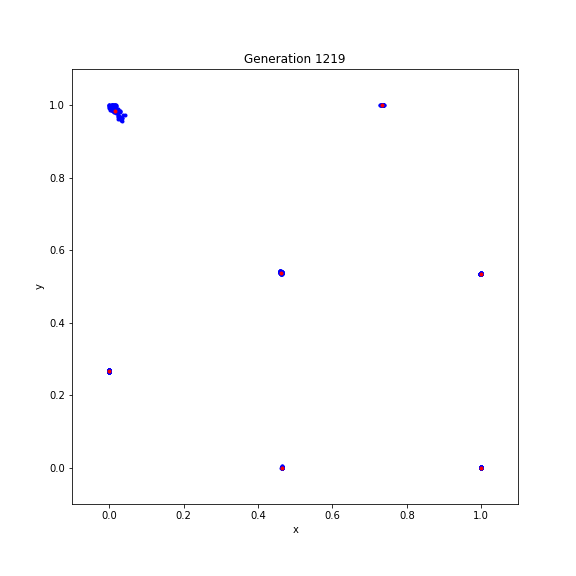

<IPython.core.display.Javascript object>


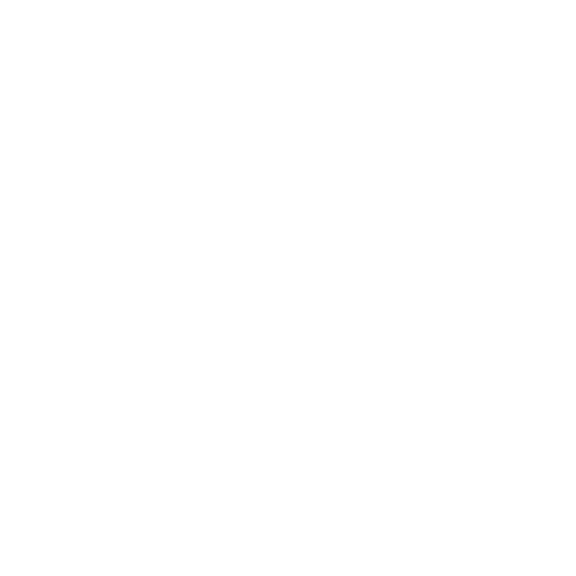

In [15]:
# Progress animation

# %matplotlib notebook
# plot_best_solution_progress(de.iter_best_agent)

%matplotlib notebook
plot_population_progress(de.iter_population, de.iter_best_agent, duration=10)

<IPython.core.display.Javascript object>


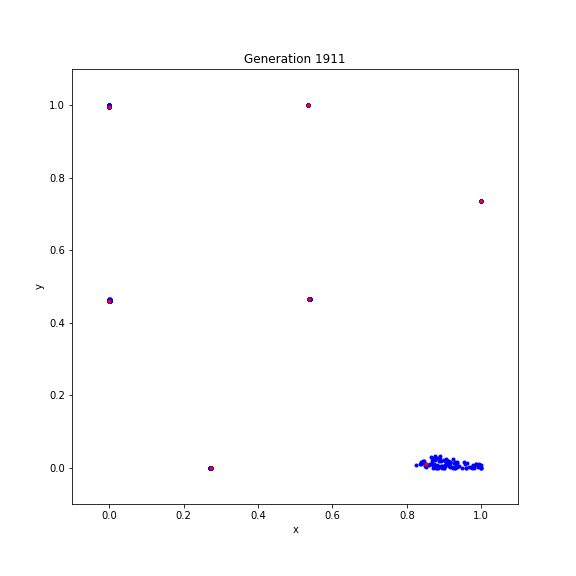

<IPython.core.display.Javascript object>


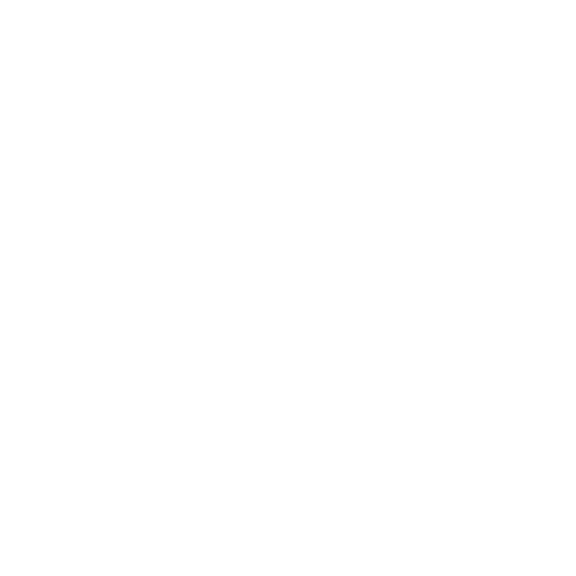

In [16]:
# Progress animation

# %matplotlib notebook
# plot_best_solution_progress(de_strict.iter_best_agent)

%matplotlib notebook
plot_population_progress(de_bp.iter_population, de_bp.iter_best_agent, duration=10)

<IPython.core.display.Javascript object>


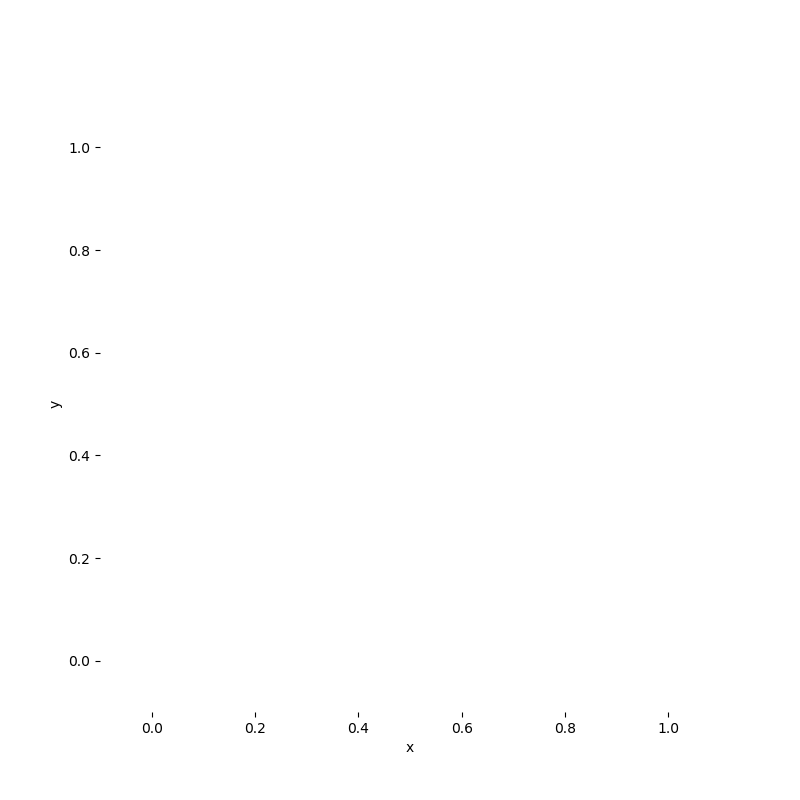

KeyboardInterrupt: 

In [6]:
# Progress animation

# %matplotlib notebook
# plot_best_solution_progress(de_strict.iter_best_agent)

%matplotlib notebook
plot_population_progress(de_strict.iter_population, de_strict.iter_best_agent, duration=10)

<IPython.core.display.Javascript object>


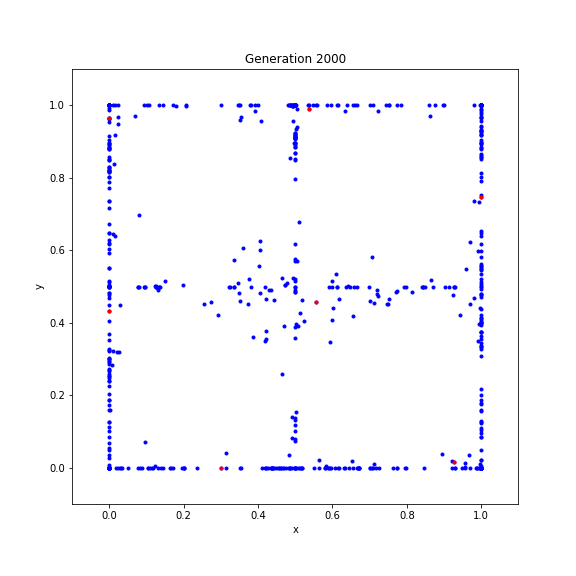

<IPython.core.display.Javascript object>


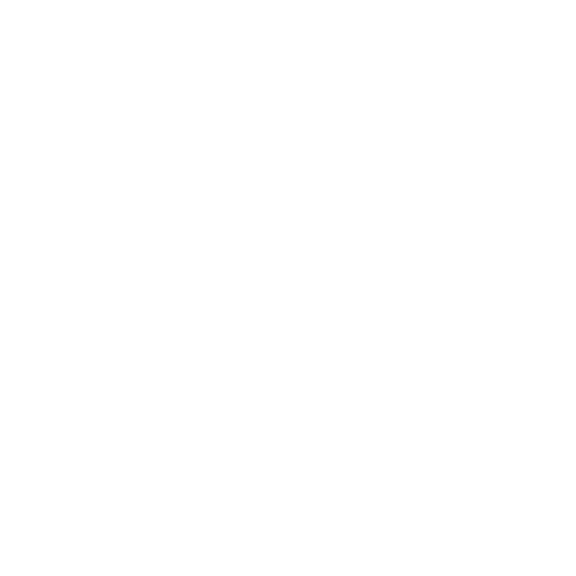

In [21]:
# %matplotlib notebook
# plot_population_progress(de_strict_bp.iter_population, de_strict_bp.iter_best_agent, duration=10)

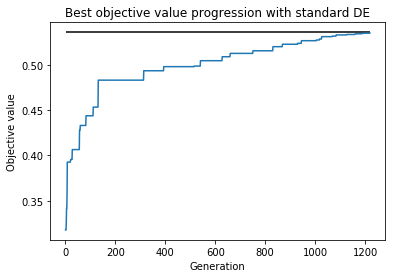

In [17]:
%matplotlib inline
plot_obj_value_progress(de.iter_best_obj_val, optimum, title="Best objective value progression with standard DE")

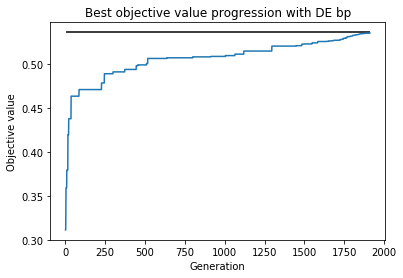

In [18]:
%matplotlib inline
plot_obj_value_progress(de_bp.iter_best_obj_val, optimum, title="Best objective value progression with DE bp")

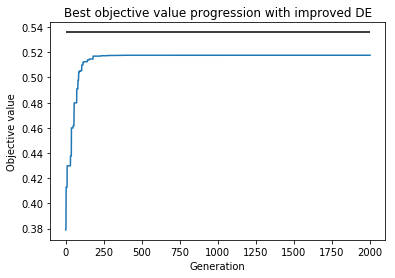

In [17]:
%matplotlib inline
plot_obj_value_progress(de_strict.iter_best_obj_val, optimum, title="Best objective value progression with improved DE")

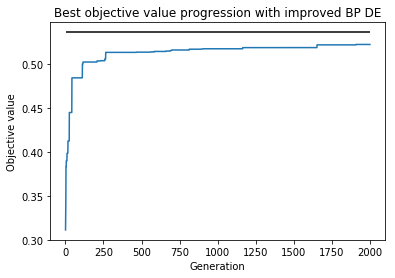

In [19]:
%matplotlib inline
plot_obj_value_progress(de_strict_bp.iter_best_obj_val, optimum, title="Best objective value progression with improved BP DE")

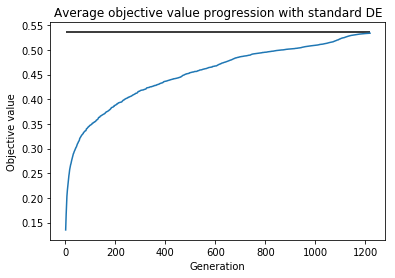

In [19]:
%matplotlib inline
plot_obj_value_progress(de.iter_avg_obj_val, optimum, title="Average objective value progression with standard DE")

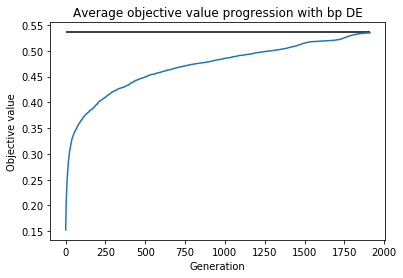

In [20]:
%matplotlib inline
plot_obj_value_progress(de_bp.iter_avg_obj_val, optimum, title="Average objective value progression with bp DE")

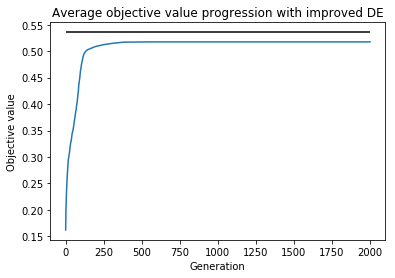

In [21]:
%matplotlib inline
plot_obj_value_progress(de_strict.iter_avg_obj_val, optimum, title="Average objective value progression with improved DE")

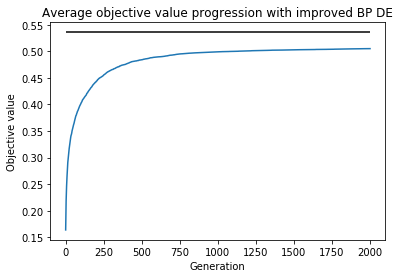

In [16]:
%matplotlib inline
plot_obj_value_progress(de_strict_bp.iter_avg_obj_val, optimum, title="Average objective value progression with improved BP DE")

In [28]:
de_strict.iter_best_obj_val

[0.2851610724971481,
 0.31111510713974405,
 0.31111510713974405,
 0.3487602659813337,
 0.3487602659813337,
 0.3612607528071687,
 0.3612607528071687,
 0.3612607528071687,
 0.3612607528071687,
 0.36746434740367434,
 0.36746434740367434,
 0.3695931557516035,
 0.3695931557516035,
 0.3695931557516035,
 0.3695931557516035,
 0.3695931557516035,
 0.3695931557516035,
 0.3768119069148026,
 0.3768119069148026,
 0.3768119069148026,
 0.3768119069148026,
 0.3768119069148026,
 0.4242515966117697,
 0.4242515966117697,
 0.4242515966117697,
 0.4242515966117697,
 0.4242515966117697,
 0.4242515966117697,
 0.4242515966117697,
 0.4242515966117697,
 0.4242515966117697,
 0.4242515966117697,
 0.443457519282424,
 0.443457519282424,
 0.443457519282424,
 0.443457519282424,
 0.443457519282424,
 0.443457519282424,
 0.443457519282424,
 0.443457519282424,
 0.443457519282424,
 0.443457519282424,
 0.443457519282424,
 0.443457519282424,
 0.443457519282424,
 0.443457519282424,
 0.443457519282424,
 0.443457519282424,
 0.4